# Setting

In [1]:
from pf_utils import PortfolioManager as PM 
from pf_utils import FinancialRatios, METRICS, FundDownloader
from pf_widgets import WidgetUniverse, WidgetTransaction, w_date

WARNING (pytensor.tensor.blas): Using NumPy C-API based implementation for BLAS functions.


In [2]:
path_data = 'data'
path_tran = 'transaction'

In [3]:
file_cost='transaction_cost'
kw_cost = {'cost': file_cost}

## Portfolios
*Review portfolio settings*

In [4]:
PM.review('portfolio')

Portfolio: MMT_2407, PER_2410, PER_2505, WTR_2407, WTR_2412, LIQ, TDF_2406, HANA_2408, SAVE_2503, SAVE_2504, FISA_2504, FCTR


In [5]:
PM.review_portfolio('WTR_2412')

{'strategy': 'WTR',
 'universe': 'UV_WTR',
 'file': 'pf_wtr2412_static',
 'path': 'transaction'}

In [6]:
#PM.review_strategy('WTR')
PM.review_portfolio('WTR_2412', strategy=True)

{'method_select': 'Selected', 'method_weigh': 'Equally'}

In [7]:
PM.review_universe('UV_WTR')
#PM.review_portfolio('WTR_2412', universe=True)

{'universe': 'etf',
 'file': 'etfs_weather',
 'tickers': 'ETF/KR',
 'path': 'data'}

In [8]:
#PM.review_universe('UV_FUND')
PM.review_portfolio('TDF_2406', universe=True)

{'universe': 'fund',
 'file': 'funds_prices',
 'tickers': 'funds_info',
 'freq': 'daily',
 'batch_size': 100,
 'check_master': True,
 'path': 'data'}

In [9]:
c = PM.get_cost('UV_WTR', file_cost, path_tran)
c['buy']

Cost data transaction_cost_250501.csv loaded


ticker
069500    0.004209
273130    0.004209
379800    0.004209
411060    0.004209
148070    0.004209
284430    0.004209
Name: buy, dtype: float64

# Universe

In [10]:
PM.review('universes')

Universe: UV_K200, UV_KRX, UV_LIQ, UV_WTR, UV_ETF, UV_FUND, UV_FNDM, UV_FCTR


In [11]:
WidgetUniverse

## K200

In [12]:
k200 = PM.create_universe('UV_K200')

200 securities from 2022-01-03 to 2025-05-02 uploaded.
Price data loaded


In [7]:
#k200.portfolio_data
#k200.get_names()

In [13]:
kw = dict(
    n_years=3, 
    close_today = WidgetUniverse.values(1)
)
k200.download(**kw) if WidgetUniverse.values(0) else None

... done
200 securities from 2022-01-03 to 2025-05-07 downloaded.
kospi200_prices_250507.csv saved
df_prices updated
Execution time of download: 50 secs


## KRX

In [9]:
krx = PM.create_universe('UV_KRX')

2712 securities from 2019-01-02 to 2024-10-08 uploaded.
Price data loaded


In [15]:
#krx.get_names()

In [16]:
kw = dict(
    n_years=3, 
    close_today = WidgetUniverse.values(1),
    interval=5, pause_duration=1, msg=False
)
#krx.download(**kw) if WidgetUniverse.values(0) else None

## WTR

In [14]:
wtr = PM.create_universe('UV_WTR')

6 securities from 2022-01-03 to 2025-05-02 uploaded.
Price data loaded


In [15]:
wtr.get_names('selected')

0) 069500: KODEX 200
1) 379800: KODEX 미국S&P500
2) 273130: KODEX 종합채권(AA-이상)액티브
3) 411060: ACE KRX금현물
4) 148070: KIWOOM 국고채10년
5) 284430: KODEX 200미국채혼합

In [16]:
#PM.review_universe('UV_WTR')

In [17]:
kw = dict(
    n_years=3, 
    close_today = WidgetUniverse.values(1),
    #tickers = ['069500', '273130', '148070', '379800', '411060', '284430']
    tickers = 'selected'
)
wtr.download(**kw) if WidgetUniverse.values(0) else None

... done
6 securities from 2022-01-03 to 2025-05-07 downloaded.
etfs_weather_250507.csv saved
df_prices updated
Execution time of download: 1 secs


In [13]:
#wtr.save()

## FCTR

In [6]:
tickers = ['LRGF','MTUM','QUAL','SIZE','SPY','USMV','VLUE']
fctr = PM.create_universe('UV_FCTR', tickers=tickers)

7 securities from 2021-01-04 to 2024-12-13 uploaded.
Price data loaded


In [7]:
fctr.get_names()

0) LRGF: iShares U.S. Equity Factor ETF
1) MTUM: iShares MSCI USA Momentum Factor ETF
2) QUAL: iShares MSCI USA Quality Factor ETF
3) SIZE: iShares MSCI USA Size Factor ETF
4) SPY: SPDR S&P 500 ETF Trust
5) USMV: iShares MSCI USA Min Vol Factor ETF
6) VLUE: iShares MSCI USA Value Factor ETF

In [8]:
kw = dict(
    n_years=3, 
    close_today = WidgetUniverse.values(1),
    #tickers=['LRGF','MTUM','QUAL','SIZE','SPY','USMV','VLUE']
    #tickers='selected'
)
fctr.download(**kw) if WidgetUniverse.values(0) else None

YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  7 of 7 completed

... done
7 securities from 2022-01-03 to 2025-03-25 downloaded.
etfs_factors_250325.csv saved
df_prices updated
Execution time of download: 2 secs


## FUND

In [13]:
fund = PM.create_universe('UV_FUND')
fund_names = fund.get_names()

23 securities from 2023-03-29 to 2025-05-07 uploaded.
Master data for 315 funds loaded.
Price data loaded


In [19]:
portfolios_fund = ['TDF','HANA','SAVE', 'FISA']
pm = PM(*portfolios_fund, verbose=False)
tickers = pm.util_performance_by_asset().index
#tickers = None

TDF_2406: done
HANA_2408: done
SAVE_2503: done
SAVE_2504: done
FISA_2504: done


In [20]:
# FISA
#tickers = tickers + ['K55107BB0404','KR5101888398','K55210CO3737','KR5236AS4826','KR5370AP9949','KR5236AS4818']
len(tickers)

24

In [21]:
kw = dict(
    start_date = '2024-06-01', 
    #close_today = WidgetUniverse.values(1),
    tickers = tickers,
    timeout = 5
)
fund.download(**kw) if WidgetUniverse.values(0) else None

Master data for 315 funds loaded.
23 tickers set to download


100%|███████████████████████████████████████████████████████████████| 23/23 [00:48<00:00,  2.13s/it]

... done
23 securities from 2023-03-29 to 2025-05-07 downloaded.
funds_prices_250507.csv saved
df_prices updated
Execution time of download: 49 secs


In [20]:
#_ = fund.save()

funds_prices_250430.csv saved


In [16]:
#fund.portfolio_data['universe']

### Master

In [6]:
import pandas as pd
file = 'funds_categories.csv'
df_cat = pd.read_csv(f'{path_data}/{file}').set_index('ticker')
df_cat.tail()

,name,seller,account,manager,asset,strategy,region
ticker,,,,,,,
K55210CO3760,신한마음편한TDF2050증권투자신탁[주식혼합-재간접형](종류C-e),삼성증권,일반,신한,주식혼합,TDF,글로벌
K55210CO3737,신한마음편한TDF2050증권투자신탁[주식혼합-재간접형](종류A-e),삼성증권,일반,신한,주식혼합,TDF,글로벌
K55105CK1667,삼성한국형TDF2050증권투자신탁UH[주식혼합-재간접형]Ae,삼성증권,일반,삼성,주식혼합,TDF,글로벌
KR5370AP9949,AB글로벌고수익증권투자신탁(채권-재간접형)종류형Ae,삼성증권,일반,AB,채권,채권,글로벌
KR5236AS4818,한국밸류10년투자증권투자신탁 1(주식)종류C-E,삼성증권,일반,한국밸류,주식,주식,국내


In [7]:
# daily
freq, batch_size = 'daily', 100
file_master = 'funds_info'
file_history = 'funds_prices'

In [10]:
# monthly
freq, batch_size = 'monthly', 24
file_master = 'fundm_info'
file_history = 'fundm_prices'

In [11]:
kw = dict(
    freq=freq, batch_size=batch_size,
    check_master=True, 
    path = path_data, msg=False,
)
fd = FundDownloader(file_master, file_historical=file_history, **kw)

*Check missing tickers in category*

In [12]:
df = fd.data_tickers.copy()
tkrs = df_cat.index.difference(df.index)
tkrs.nunique()

0

In [45]:
# uncomment to update data_tickers with category
fd.data_tickers = pd.concat([df, df_cat.loc[tkrs, 'name']])

In [46]:
overwrite=False
#overwrite=True # update all conversion data
fd.update_master(overwrite=overwrite)

100%|███████████████████████████████████████████████████████████████| 14/14 [00:01<00:00,  8.22it/s]


1.7 secs elapsed, 0.0 secs paused (0.0%)


100%|█████████████████████████████████████████████████████████████████| 2/2 [00:00<00:00, 10.12it/s]


0.2 secs elapsed, 0.0 secs paused (0.0%)
fundm_info_250501.csv saved


### Monthly

In [13]:
fund = PM.create_universe('UV_FNDM')

313 securities from 2005-01-31 to 2025-03-31 uploaded.
Master data for 315 funds loaded.
Price data loaded


In [14]:
kw = dict(
    n_years=20, 
    #close_today = WidgetUniverse.values(1),
    #tickers='selected',
    append=True # download new tickers to update existing data
)
fund.download(**kw) if WidgetUniverse.values(0) else None

Master data for 315 funds loaded.
Update existing data with 2 tickers
2 tickers set to download


100%|█████████████████████████████████████████████████████████████████| 2/2 [00:19<00:00,  9.57s/it]

... done
315 securities from 2005-01-31 to 2025-03-31 downloaded.
fundm_prices_250331c_250331.csv saved
df_prices updated
Execution time of download: 19 secs


In [51]:
_ = fund.save()

fundm_prices_250430.csv saved


### Cost

*Check missing cost data*

In [12]:
universe = 'UV_FUND'
#universe = 'UV_FNDM'

In [13]:
_ = PM.check_cost(universe, file_cost, path_tran)

Cost data transaction_cost_250425.csv loaded
22 securities from 2023-03-29 to 2025-04-30 uploaded.
Master data for 315 funds loaded.
Price data loaded


*Update cost data for uiniverse UV_FUND, except for which of universes updated with manual editting*

In [14]:
fund = PM.create_universe(universe)
fd = FundDownloader.create(fund)
fd.export_cost(universe, file_cost, path=path_tran, update=True)
#fd.export_cost(universe)

22 securities from 2023-03-29 to 2025-04-30 uploaded.
Master data for 315 funds loaded.
Price data loaded
Master data for 315 funds loaded.
Cost data transaction_cost_250425.csv loaded
Cost data saved to transaction_cost_250501.csv


### Direct

In [4]:
file_master = 'funds_info_250325'
file_history = 'funds_prices_250326.csv'
kw = dict(
    freq='daily', batch_size=100,
    check_master=True, 
    path = path_data, msg=False,
)
fd = FundDownloader(file_master, file_historical=file_history, **kw)

*check missing tickers*

In [5]:
import pandas as pd
file = 'funds_categories.csv'
df_cat = pd.read_csv(f'{path_data}/{file}').set_index('ticker')

#cond = df_cat['seller'] == '기업은행'
#cond = cond & (df_cat['account'] == '일반')
#tickers = df_cat.index[cond]
tickers = df_cat.index
tickers.difference(fd.data_tickers.index)

Index([], dtype='object', name='ticker')

In [15]:
tickers = None
fd.set_tickers(tickers=tickers)

242 tickers set to download


In [ ]:
start_date, end_date = '2024-01-01', '2025-03-25'
_ = fd.download(start_date, end_date)

In [17]:
fd.df_prices.columns.size

232

### Case: Cost
*check [Additional Data](#Additional-Data) to update cost data (file_cost)*

In [12]:
universe = 'UV_FUND'
fund = PM.create_universe(universe)
cost = PM.get_cost(universe, file=file_cost, path=path_tran)

23 securities from 2023-03-29 to 2025-05-07 uploaded.
Master data for 315 funds loaded.
Price data loaded
Cost data transaction_cost_250501.csv loaded


In [13]:
import random
tickers = random.sample(list(fund.df_prices.columns), 3)
#tickers = ['K55301BU5479', 'K55234DF2988', 'K55223BT1757']
#tickers = ['K55307DH1659', 'K55210E77483']

In [14]:
fund.get_names(tickers)

0) K55234DF3150: IBK로우코스트TDF2050증권자투자신탁[혼합-재간접형]종류C-Re
1) K55214CD4825: 유진챔피언중단기채증권자투자신탁(채권)ClassC-Re
2) KR5236AS4818: 한국밸류10년투자증권투자신탁 1(주식)종류C-E

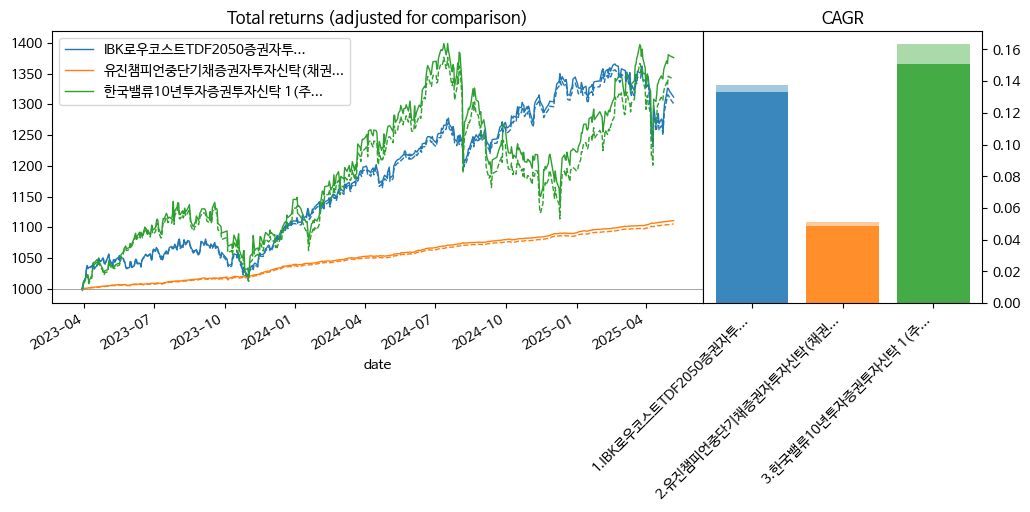

In [15]:
fund.plot(tickers, cost=cost, base=1000)

## LIQ

In [17]:
# portfolio of past trading system to liquidate soon
selected = [
    '011780', '066570', '035890', '040420', '140520', 
    '072990', '091580', '011200', '002220', '006650', 
    '136490', '064550', '460860', '040910', '024950',
    '900070', '036580', '184230', '460850', '016250',
    '001230', '049470', '217820', '109960'
]

In [18]:
liq = PM.create_universe('UV_LIQ')

24 securities from 2022-01-03 to 2025-04-29 uploaded.
Price data loaded


In [19]:
#liq.get_names()

In [20]:
kw = dict(
    n_years=3, 
    tickers= 'selected', #selected,
    close_today = WidgetUniverse.values(1),
    interval=5, pause_duration=1, msg=False
)
liq.download(**kw) if WidgetUniverse.values(0) else None

REMINDER: 24 tickers set regardless of market


100%|███████████████████████████████████████████████████████████████| 24/24 [00:01<00:00, 14.31it/s]

1.7 secs elapsed, 0.0 secs paused (0.0%)
... done
24 securities from 2022-01-03 to 2025-04-30 downloaded.
krx_liq_prices_250430.csv saved
df_prices updated
Execution time of download: 2 secs


## Additional Data

### Cost

*Check missing cost data*

In [35]:
#universe = 'UV_FUND'
universe = 'UV_FNDM'

In [36]:
_ = PM.check_cost(universe, file_cost, path_tran)

Cost data transaction_cost_250424.csv loaded
300 securities from 2005-01-31 to 2025-03-31 uploaded.
Master data for 300 funds loaded.
Price data loaded


### Financial Ratio

In [4]:
WidgetUniverse

In [5]:
file = 'kospi200_ratios.csv'
fr = FinancialRatios(file, path_data)

Financial ratios of 200 stocks from 2023-01-02 to 2025-04-25 loaded


In [6]:
start_fr = '2023-01-01'
universe = 'UV_K200'
freq = 'day'

if WidgetUniverse.values(0):
    tickers = PM.create_universe(universe).df_prices.columns.to_list()
    kw = dict(
        freq = freq,
        close_today = WidgetUniverse.values(1)
    )
    fr.download(tickers, start_fr, **kw)

In [7]:
fratio = 'PER'
df_ratio = fr.util_reshape(fratio, stack=False)

In [8]:
df = PM.create_universe(universe).df_prices
fr.util_compare_periods(df)

200 securities from 2022-01-03 to 2025-04-25 uploaded.
Price data loaded
Ratio: 2023-01-02 ~ 2025-04-25
Price: 2022-01-03 ~ 2025-04-25


# Performance

In [16]:
PM.review()

Portfolio: MMT_2407, PER_2410, PER_2505, WTR_2407, WTR_2412, LIQ, TDF_2406, HANA_2408, SAVE_2503, SAVE_2504, FISA_2504, FCTR


In [17]:
pfs = ['MMT', 'PER', 'WTR']
pm = PM(*pfs, **kw_cost)

MMT_2407:
200 securities from 2022-01-03 to 2025-05-07 uploaded.
Price data loaded
Cost data transaction_cost_250501.csv loaded
Transaction record to 2025-04-16 loaded

PER_2410:
200 securities from 2022-01-03 to 2025-05-07 uploaded.
Price data loaded
Cost data transaction_cost_250501.csv loaded
Transaction record to 2024-11-11 loaded
Run check_universe to get the list of missing assets

PER_2505:
200 securities from 2022-01-03 to 2025-05-07 uploaded.
Price data loaded
Cost data transaction_cost_250501.csv loaded
REMINDER: make sure this is 1st transaction as no records provided

WTR_2407:
6 securities from 2022-01-03 to 2025-05-07 uploaded.
Price data loaded
Cost data transaction_cost_250501.csv loaded
Transaction record to 2025-02-13 loaded

WTR_2412:
6 securities from 2022-01-03 to 2025-05-07 uploaded.
Price data loaded
Cost data transaction_cost_250501.csv loaded
Transaction record to 2024-12-18 loaded



In [18]:
#pm.load('LIQ')
#pm.load('TDF_2406','HANA_2408')

security_names updated
Data of tickers 009900, 016380 downloaded


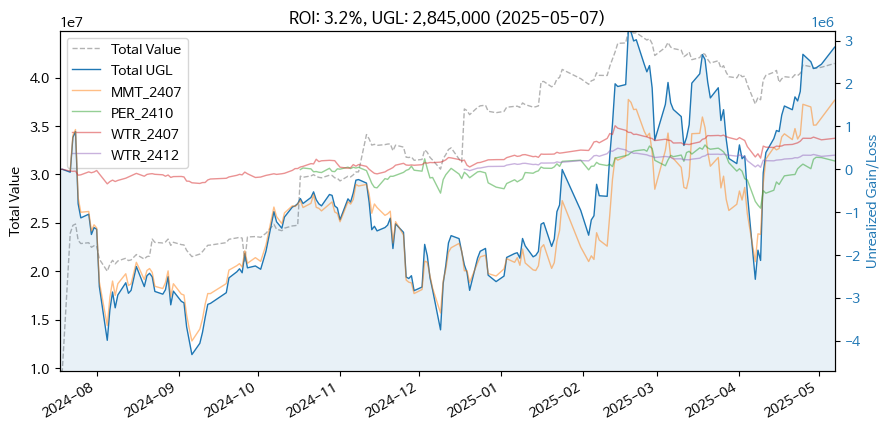

In [19]:
start_date='2024-07-01'
#pm.plot('MMT', start_date=start_date)
#pm.plot(pf_list, start_date=start_date)
pm.plot(start_date=start_date, roi=False)

In [20]:
w_date

DatePicker(value=None, layout=Layout(width='200px'), step=1)

In [22]:
pm.summary(date=w_date.value, exclude_cost=True)

portfolio,MMT_2407,PER_2410,WTR_2407,WTR_2412,TOTAL
start,2024-07-22,2024-10-17,2024-07-18,2024-12-18,2024-07-18
end,2025-05-07,2025-05-07,2025-05-07,2025-05-07,2025-05-07
buy,"60,561,900","12,249,820","10,365,272","5,783,200","88,960,192"
sell,"46,870,851","2,621,865","943,120",0.0,"50,435,836"
value,"15,410,300","9,842,817","10,148,675","6,113,449","41,515,241"
ugl,"1,719,251","214,862","726,523","330,249","2,990,885"
roi,0.0284,0.0175,0.0701,0.0571,0.0336


Custom category loaded: portfolio2


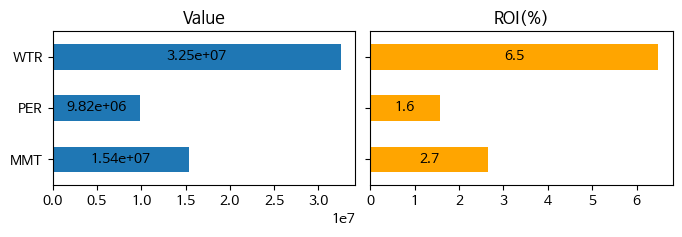

In [23]:
# custome category of portfolio type
df = pm.util_performance_by_asset()
sr = df['portfolio'].str.split('_').str.get(0).rename('portfolio2')
pm.import_category(sr)

pm.summary(category='portfolio2', plot=True, figsize=(8,2))

*print summary for google sheet 금융자산운용*

In [24]:
pm.util_print_summary(date=w_date.value)

2025-05-07, MMT, 2407, , , , 평가, , 60559696, 46784778, 15381437, 1606519, 0.0265
2025-05-07, PER, 2410, , , , 평가, , 12249374, 2617050, 9824378, 192054, 0.0157
2025-05-07, WTR, 2407, , , , 평가, , 10364836, 942797, 10142122, 720084, 0.0695
2025-05-07, WTR, 2412, , , , 평가, , 5782957, 0.0, 6109531, 326574, 0.0565


### All Funds

In [25]:
portfolios_fund = ['TDF','HANA','SAVE', 'FISA']
pm = PM(*portfolios_fund, **kw_cost, verbose=True)

TDF_2406:
23 securities from 2023-03-29 to 2025-05-07 uploaded.
Master data for 315 funds loaded.
Price data loaded
Cost data transaction_cost_250501.csv loaded
Transaction record to 2025-04-21 loaded

HANA_2408:
23 securities from 2023-03-29 to 2025-05-07 uploaded.
Master data for 315 funds loaded.
Price data loaded
Cost data transaction_cost_250501.csv loaded
Transaction record to 2024-08-01 loaded

SAVE_2503:
23 securities from 2023-03-29 to 2025-05-07 uploaded.
Master data for 315 funds loaded.
Price data loaded
Cost data transaction_cost_250501.csv loaded
Transaction record to 2025-03-17 loaded

SAVE_2504:
23 securities from 2023-03-29 to 2025-05-07 uploaded.
Master data for 315 funds loaded.
Price data loaded
Cost data transaction_cost_250501.csv loaded
Transaction record to 2025-04-21 loaded

FISA_2504:
23 securities from 2023-03-29 to 2025-05-07 uploaded.
Master data for 315 funds loaded.
Price data loaded
Cost data transaction_cost_250501.csv loaded
Transaction record to 2025-

In [26]:
pm.summary()

portfolio,FISA_2504,HANA_2408,SAVE_2503,SAVE_2504,TDF_2406,TOTAL
start,2025-04-28,2024-08-01,2025-03-17,2025-04-21,2024-06-19,2024-06-19
end,2025-05-07,2025-05-07,2025-05-07,2025-05-07,2025-05-07,2025-05-07
buy,"30,960,600","9,990,000","7,067,714","3,584,916","48,148,612","99,751,842"
sell,-252.0,0.0,0.0,0.0,"-102,860","-103,112"
value,"30,937,786","10,194,239","7,018,114","3,588,565","46,913,800","98,652,504"
ugl,"-23,066","204,239","-49,600","3,649","-1,337,672","-1,202,450"
roi,-0.000745,0.0204,-0.00702,0.00102,-0.0278,-0.0121


In [27]:
file = 'funds_categories.csv'
pm.import_category(file, path_data, exclude='name')

Custom category loaded: account, asset, manager, region, seller, strategy


In [28]:
file = 'funds_custom_category.csv'

# uncomment to save all tickers and their names 
#df = pm.util_performance_by_asset()
#df['name'].drop_duplicates().sort_values().to_csv(f'{path_data}/{file}')

pm.import_category(file, path_data)

Custom category loaded: name2


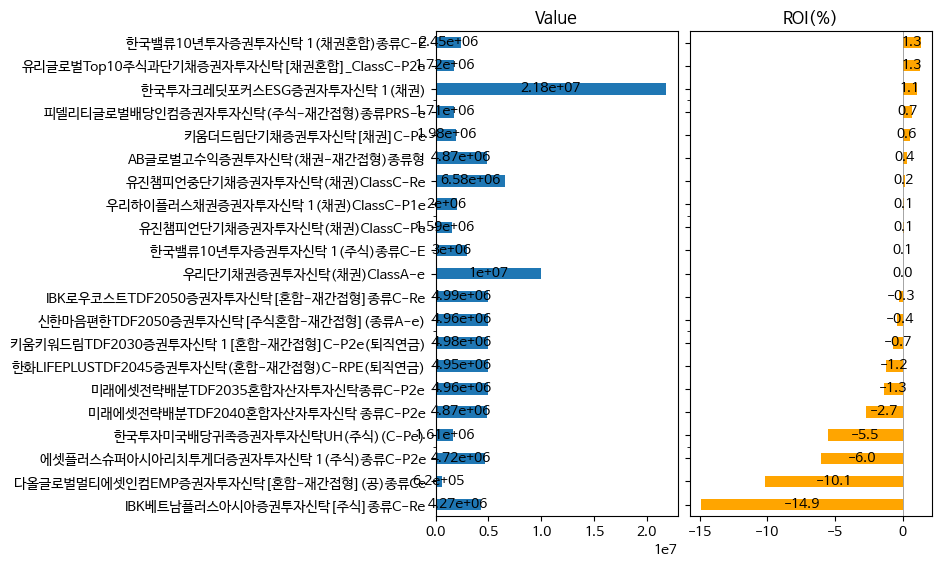

In [29]:
category = 'name2'
pm.summary(category=category, plot=True, roi=True, sort_by='roi')

# Transaction

## MMT

In [30]:
pf_mmt = PM.create_portfolio('MMT_2407', **kw_cost) 

200 securities from 2022-01-03 to 2025-05-07 uploaded.
Price data loaded
Cost data transaction_cost_250501.csv loaded
Transaction record to 2025-04-16 loaded


In [31]:
# run after editting record file
pf_mmt.update_record()

In [32]:
pf_mmt.view_record(-2, nshares=True)

name   price  transaction  net  weight  weight*  \
date       ticker                                                           
2025-03-14 000150           두산  340250            9    9     0.2    0.193   
           003230         삼양식품  923000           -1    3     0.2    0.175   
           010120  LS ELECTRIC  208500          -14    0     0.0    0.000   
           012450    한화에어로스페이스  751000           -1    3     0.2    0.189   
           042660         한화오션   76550           45   45     0.2    0.217   
           064350         현대로템  108300           33   33     0.2    0.225   
           267260     HD현대일렉트릭  356500           -9    0     0.0    0.000   
           298040        효성중공업  473000           -7    0     0.0    0.000   
2025-04-16 000150           두산  271999           -9    0     0.0    0.000   
           003230         삼양식품  932000            0    3     0.2    0.196   
           012450    한화에어로스페이스  788000            0    3     0.2    0.165   
           042660         한화오션   78099           -6   39     0.2    0.213   
           064350         현대로템  109200           -4   29     0.2    0.222   
           329180      HD현대중공업  364000            8    8     0.2    0.204   

                       date*  
date       ticker             
2025-03-14 000150 2025-03-17  
           003230 2025-03-17  
           010120 2025-03-17  
           012450 2025-03-17  
           042660 2025-03-17  
           064350 2025-03-17  
           267260 2025-03-17  
           298040 2025-03-17  
2025-04-16 000150 2025-04-17  
           003230 2025-04-17  
           012450 2025-04-17  
           042660 2025-04-17  
           064350 2025-04-17  
           329180 2025-04-17

*daily transactions for book keeping*

In [33]:
#pf_mmt.get_cash_history(cumsum=False, date_actual=True)

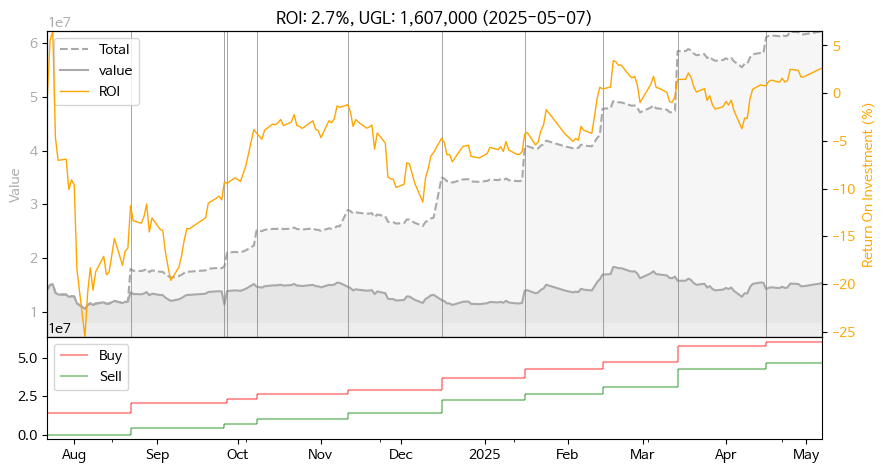

In [34]:
pf_mmt.plot(total=True)

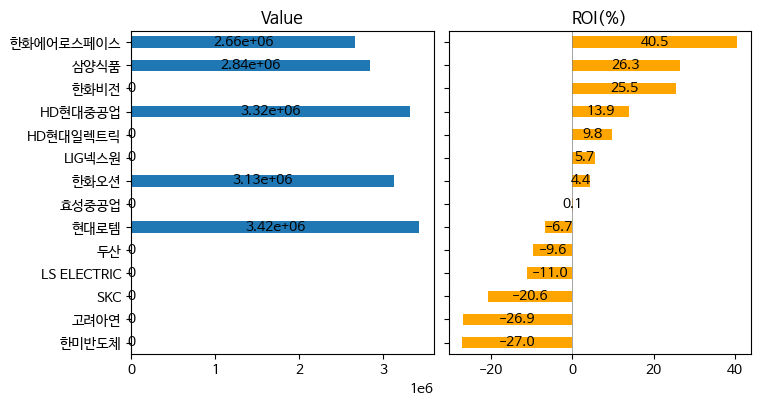

In [35]:
_ = pf_mmt.plot_assets(figsize=(8,3), exclude_sold=False)

In [37]:
date = None
#date = '2025-01-17'
pf_mmt.valuate(date, print_msg=True, join_str=True, exclude_cost=False)

start, end, buy, sell, value, ugl, roi
2024-07-22, 2025-05-07, 60559696, 46784778, 15381439, 1606521, 0.0265


start    2024-07-22
end      2025-05-07
buy      60,559,696
sell     46,784,778
value    15,381,439
ugl       1,606,521
roi          0.0265
dtype: object

In [82]:
# set kwargs of transaction_pipeline
WidgetTransaction

In [83]:
kw = dict(
    #sell = ['010120'],
    date = WidgetTransaction.values(0),
    save = WidgetTransaction.values(2),
)
#_ = pf_mmt.transaction_halt(**kw) 

Updated with transaction on 2025-04-21
Set save=True to save transaction record
ROI: 1.6%, UGL: 969,873 (2025-04-22)


In [11]:
pf_mmt.cost['buy']

0.0036396

In [73]:
date_actual='2025-05-16
cost_buy = pf_mmt.cost['buy'] if 'buy' in pf_mmt.cost['buy'] else 0

kw = dict(
    nshares = True,
    date = WidgetTransaction.values(0),
    capital = WidgetTransaction.values(1),
    #capital = 0.15,
    commissions = cost_buy
    save = WidgetTransaction.values(2),
    date_actual=date_actual
)

_ = pf_mmt.transaction_pipeline(**kw)

5 tickers selected by Total return from 2024-04-15 to 2025-04-14
Weights of tickers determined by Equal weights.
Rebalancing by selling 0% of the portfolio value (0)
Mean absolute error of weights: 4 %
ROI: 1.6%, UGL: 951,358 (2025-04-22)
Set save=True to save transaction record


In [74]:
pf_mmt.view_record(-2, nshares=True)

name   price  transaction  net  weight  weight*  \
date       ticker                                                         
2025-04-16 000150         두산  271999           -9    0     0.0    0.000   
           003230       삼양식품  932000            0    3     0.2    0.196   
           012450  한화에어로스페이스  788000            0    3     0.2    0.165   
           042660       한화오션   78099           -6   39     0.2    0.213   
           064350       현대로템  109200           -4   29     0.2    0.222   
           329180    HD현대중공업  364000            8    8     0.2    0.204   
2025-04-21 003230       삼양식품  957000            0    3     0.2    0.207   
           012450  한화에어로스페이스  830000            0    3     0.2    0.179   
           042660       한화오션   77900           -2   37     0.2    0.208   
           064350       현대로템  113000           -4   25     0.2    0.203   
           329180    HD현대중공업  352000            0    8     0.2    0.203   

                       date*  
date       ticker             
2025-04-16 000150 2025-04-17  
           003230 2025-04-17  
           012450 2025-04-17  
           042660 2025-04-17  
           064350 2025-04-17  
           329180 2025-04-17  
2025-04-21 003230 2025-05-16  
           012450 2025-05-16  
           042660 2025-05-16  
           064350 2025-05-16  
           329180 2025-05-16

## KRX
*simulation*

In [40]:
pf_krx = PM.create_portfolio('KRX', **kw_cost)

ERROR: No 'KRX'. select one of MMT_2407, PER_2410, WTR_2407, WTR_2412, LIQ, TDF_2406, HANA_2408, FCTR, TEST


In [ ]:
pf_krx.view_record(-2)

In [ ]:
pf_krx.valuate()

In [22]:
# set kwargs of transaction_pipeline
WidgetTransaction

In [23]:
kwargs_trs = dict(
    date = WidgetTransaction.values(0),
    capital = WidgetTransaction.values(1),
    save = WidgetTransaction.values(2),
    nshares=True
)

_ = pf_krx.transaction_pipeline(**kwargs_trs)
pf_krx.view_record(-2)

Liquidation set to None
5 tickers selected by Total return from 2023-08-02 to 2024-08-02
Weights of tickers determined by Equal weights.
Mean absolute error of weights: 1 %
ROI: -3.7%, UGL: -364,000  (2024-10-08)
Set save=True to save transaction record


name  ratio  transaction      net  weight  weight*  \
date       ticker                                                         
2024-09-02 078860  엔에스이엔엠      1      1998150  1998150     0.2    0.201   
           016670     디모아      1      1996800  1996800     0.2    0.201   
           033790      피노      1      1996750  1996750     0.2    0.201   
           159910   스킨앤스킨      1      1999880  1999880     0.2    0.202   
           196170    알테오젠      1      1932000  1932000     0.2    0.195   

                       date*  
date       ticker             
2024-09-02 078860 2024-09-02  
           016670 2024-09-02  
           033790 2024-09-02  
           159910 2024-09-02  
           196170 2024-09-02

## PER

In [23]:
file = 'kospi200_ratios.csv'
df_ratio = FinancialRatios.util_get_ratio('PER', file, path_data)

Financial ratios of 200 stocks from 2023-01-02 to 2025-04-25 loaded


In [24]:
pf = 'PER_2410'
#pf = 'PER_2505'

pf_per = PM.create_portfolio(pf, df_additional=df_ratio, **kw_cost)

200 securities from 2022-01-03 to 2025-05-02 uploaded.
Price data loaded
Cost data transaction_cost_250501.csv loaded
Transaction record to 2024-11-11 loaded
Run check_universe to get the list of missing assets


*Set assets to liquidate as delisted from KOSPI200*

In [24]:
tickers_liq = pf_per.check_universe()

In [25]:
pf_per.view_record(-1)

name     ratio  transaction     net  weight  weight*  \
date       ticker                                                            
2024-11-11 010060   OCI홀딩스  1.006689      -358800  478400    0.05    0.050   
           003030   세아제강지주  0.994309      -773200  386600    0.05    0.040   
           009970  영원무역홀딩스  0.997666      -514200  428500    0.05    0.045   
           016380     KG스틸  1.001517      -514020  500840    0.05    0.052   
           047040     대우건설  0.993122      -461645  508900    0.05    0.053   
           088350     한화생명  1.001745       515700  515700    0.05    0.054   
           078930       GS  1.002404       499200  499200    0.05    0.052   
           111770     영원무역  0.996264       481800  481800    0.05    0.050   
           139130  DGB금융지주  1.004848       519750  519750    0.05    0.054   
           005830   DB손해보험  1.016838       427600  427600    0.05    0.044   
           001450     현대해상  1.000000       505750  505750    0.05    0.053   
           009900     명신산업  1.008715       495720  495720    0.05    0.052   
           241560     두산밥캣  0.995000       520000  520000    0.05    0.054   
           000270       기아  1.010684       468000  468000    0.05    0.049   
           024110     기업은행  1.002059       509950  509950    0.05    0.053   
           005850      에스엘  1.014354       501600  501600    0.05    0.052   
           316140   우리금융지주  1.001244       514560  514560    0.05    0.054   
           138930  BNK금융지주  1.003181       518650  518650    0.05    0.054   
           005380      현대차  1.007160       419000  419000    0.05    0.044   
           017800   현대엘리베이  1.084233       416700  416700    0.05    0.043   

                       date*  
date       ticker             
2024-11-11 010060 2024-11-11  
           003030 2024-11-11  
           009970 2024-11-11  
           016380 2024-11-11  
           047040 2024-11-11  
           088350 2024-11-11  
           078930 2024-11-11  
           111770 2024-11-11  
           139130 2024-11-11  
           005830 2024-11-11  
           001450 2024-11-11  
           009900 2024-11-11  
           241560 2024-11-11  
           000270 2024-11-11  
           024110 2024-11-11  
           005850 2024-11-11  
           316140 2024-11-11  
           138930 2024-11-11  
           005380 2024-11-11  
           017800 2024-11-11

In [25]:
pf_per.valuate(total=True, print_msg=True, join_str=True)

security_names updated
Data of tickers 009900, 016380 downloaded
Tickers 009900, 016380 added to universe
start, end, buy, sell, value, ugl, roi
2024-10-17, 2025-05-02, 12250266, 2617050, 9921740, 288524, 0.02355249892666511


start    2024-10-17
end      2025-05-02
buy      12,250,266
sell      2,617,050
value     9,921,740
ugl         288,524
roi        0.023552
dtype: object

In [27]:
#pf_per.update_record()
#pf_per.view_record(-2)

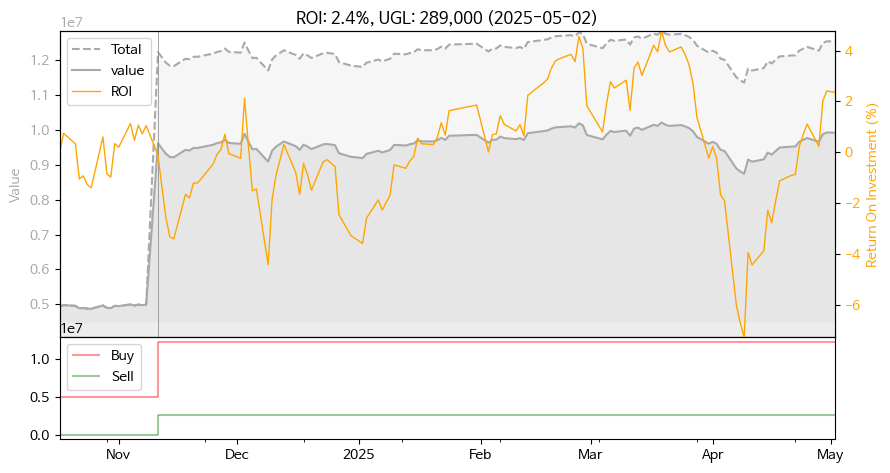

In [28]:
pf_per.plot()

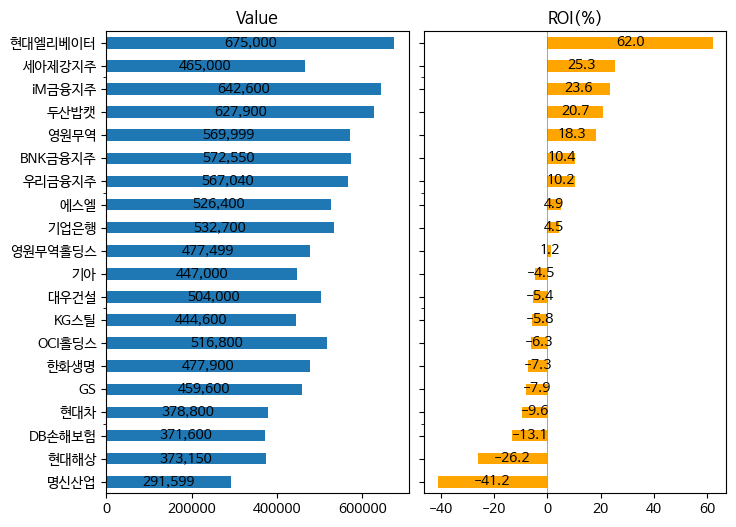

In [29]:
_ = pf_per.plot_assets(figsize=(8,6))

In [12]:
start_fr = '2023-01-01'
_ = pf_per.check_additional(start_fr)

Returning missing tickers


In [7]:
# set kwargs of transaction_pipeline
WidgetTransaction

In [8]:
kw = dict(
    sell = {'009900': 300000, '016380': 450000},
    #halt = tickers_liq, # testing
    date = WidgetTransaction.values(0),
    save = WidgetTransaction.values(2),
)
_ = pf_per.transaction_halt(**kw) 

REMINDER: For the sell price, use the total amount, not the unit price.
Updated with transaction on 2025-04-25
security_names updated
Data of tickers 009900, 016380 downloaded
Tickers 009900, 016380 added to universe
Set save=True to save transaction record
ROI: 1.2%, UGL: 141,585 (2025-04-25)


In [9]:
pf_per.view_record(-1, nshares=True)

name   price  transaction  net  weight  weight*  \
date       ticker                                                       
2025-04-25 000270       기아   88200            0    5    0.05    0.049   
           001450     현대해상   20800            0   17    0.05    0.039   
           003030   세아제강지주  231500            0    2    0.05    0.051   
           005380      현대차  188800            0    2    0.05    0.042   
           005830   DB손해보험   87400            0    4    0.05    0.039   
           005850      에스엘   33800            0   16    0.05    0.060   
           009900     명신산업     599         -500    0    0.05    0.000   
           009970  영원무역홀딩스   94400            0    4    0.05    0.052   
           010060   OCI홀딩스   68100            0    8    0.05    0.060   
           016380     KG스틸     909         -494    0    0.05    0.000   
           017800   현대엘리베이   71900            0    9    0.05    0.072   
           024110     기업은행   14970            0   35    0.05    0.058   
           047040     대우건설    3375            0  140    0.05    0.052   
           078930       GS   38350            0   12    0.05    0.051   
           088350     한화생명    2580            0  180    0.05    0.051   
           111770     영원무역   47200            0   11    0.05    0.063   
           138930  BNK금융지주   10570            0   55    0.05    0.064   
           139130  DGB금융지주    9710            0   63    0.05    0.068   
           241560     두산밥캣   46350            0   13    0.05    0.067   
           316140   우리금융지주   17300            0   32    0.05    0.061   

                       date*  
date       ticker             
2025-04-25 000270 2025-04-25  
           001450 2025-04-25  
           003030 2025-04-25  
           005380 2025-04-25  
           005830 2025-04-25  
           005850 2025-04-25  
           009900 2025-04-25  
           009970 2025-04-25  
           010060 2025-04-25  
           016380 2025-04-25  
           017800 2025-04-25  
           024110 2025-04-25  
           047040 2025-04-25  
           078930 2025-04-25  
           088350 2025-04-25  
           111770 2025-04-25  
           138930 2025-04-25  
           139130 2025-04-25  
           241560 2025-04-25  
           316140 2025-04-25

In [23]:
#date_actual='2025-11-12'
date_actual='2025-05-12'
kw = dict(
    date = WidgetTransaction.values(0),
    capital = WidgetTransaction.values(1),
    save = WidgetTransaction.values(2),
    nshares=True,
    date_actual = date_actual
)
_ = pf_per.transaction_pipeline(**kw)

20 tickers selected by Financial Ratio from 2025-02-25 to 2025-04-25
Weights of tickers determined by Equal weights.
Mean absolute error of weights: 4 %
ROI: -0.0%, UGL: -526.1001764405519 (2025-04-25)
Set save=True to save transaction record


In [24]:
pf_per.view_record(-1, nshares=True)

name   price  transaction  net  weight  weight*  \
date       ticker                                                       
2025-04-25 010060   OCI홀딩스   68100           11   11    0.05    0.052   
           047040     대우건설    3375          222  222    0.05    0.052   
           078930       GS   38350           19   19    0.05    0.050   
           088350     한화생명    2580          290  290    0.05    0.052   
           009970  영원무역홀딩스   94400            7    7    0.05    0.046   
           001450     현대해상   20800           36   36    0.05    0.052   
           005830   DB손해보험   87400            8    8    0.05    0.048   
           003030   세아제강지주  231500            3    3    0.05    0.048   
           105630     한세실업   11140           67   67    0.05    0.052   
           111770     영원무역   47200           15   15    0.05    0.049   
           000270       기아   88200            8    8    0.05    0.049   
           139130   iM금융지주    9710           77   77    0.05    0.052   
           005380      현대차  188800            3    3    0.05    0.039   
           069260   TKG휴켐스   16200           46   46    0.05    0.052   
           005850      에스엘   33800           22   22    0.05    0.051   
           024110     기업은행   14970           50   50    0.05    0.052   
           028050    삼성E&A   18940           39   39    0.05    0.051   
           316140   우리금융지주   17300           43   43    0.05    0.051   
           001430  세아베스틸지주   17640           42   42    0.05    0.051   
           241560     두산밥캣   46350           16   16    0.05    0.051   

                        date*  
date       ticker              
2025-04-25 010060  2025-05-12  
           047040  2025-05-12  
           078930  2025-05-12  
           088350  2025-05-12  
           009970  2025-05-12  
           001450  2025-05-12  
           005830  2025-05-12  
           003030  2025-05-12  
           105630  2025-05-12  
           111770  2025-05-12  
           000270  2025-05-12  
           139130  2025-05-12  
           005380  2025-05-12  
           069260  2025-05-12  
           005850  2025-05-12  
           024110  2025-05-12  
           028050  2025-05-12  
           316140  2025-05-12  
           001430  2025-05-12  
           241560  2025-05-12

In [54]:
#pf_per.update_record()

## WTR
*modified all weather*

In [30]:
# pf & rebal date
pf, date_actual = 'WTR_2407', '2025-08-14'
#pf, date_actual = 'WTR_2412', '2025-06-18'

In [31]:
pf_wtr = PM.create_portfolio(pf, **kw_cost) 

6 securities from 2022-01-03 to 2025-05-02 uploaded.
Price data loaded
Cost data transaction_cost_250501.csv loaded
Transaction record to 2025-02-13 loaded


In [32]:
#pf_wtr.portfolio_data['strategy']
pf_wtr.update_record()

In [33]:
pf_wtr.view_record(-2, nshares=True)

name   price  transaction  net  weight  \
date       ticker                                                           
2024-11-20 069500             KODEX 200   32493            7   49  0.1670   
           148070          KOSEF 국고채10년  113034           -1   13  0.1670   
           273130  KODEX 종합채권(AA-이상)액티브  114815            0   14  0.1670   
           284430        KODEX 200미국채혼합   12585            4  128  0.1670   
           379800      KODEX 미국S&P500TR   18733           -8   86  0.1670   
           411060            ACE KRX금현물   17040          -10   96  0.1670   
2025-02-13 069500             KODEX 200   34061            1   51  0.1667   
           148070         KIWOOM 국고채10년  115030            1   15  0.1667   
           273130  KODEX 종합채권(AA-이상)액티브  117125            0   14  0.1667   
           284430        KODEX 200미국채혼합   13090            5  134  0.1667   
           379800        KODEX 미국S&P500   20153            1   87  0.1667   
           411060            ACE KRX금현물   24065          -21   75  0.1667   

                   weight*      date*  
date       ticker                      
2024-11-20 069500    0.168 2024-11-20  
           148070    0.158 2024-11-20  
           273130    0.167 2024-11-20  
           284430    0.169 2024-11-20  
           379800    0.168 2024-11-20  
           411060    0.170 2024-11-20  
2025-02-13 069500    0.168 2025-02-14  
           148070    0.165 2025-02-14  
           273130    0.157 2025-02-14  
           284430    0.168 2025-02-14  
           379800    0.168 2025-02-14  
           411060    0.173 2025-02-14

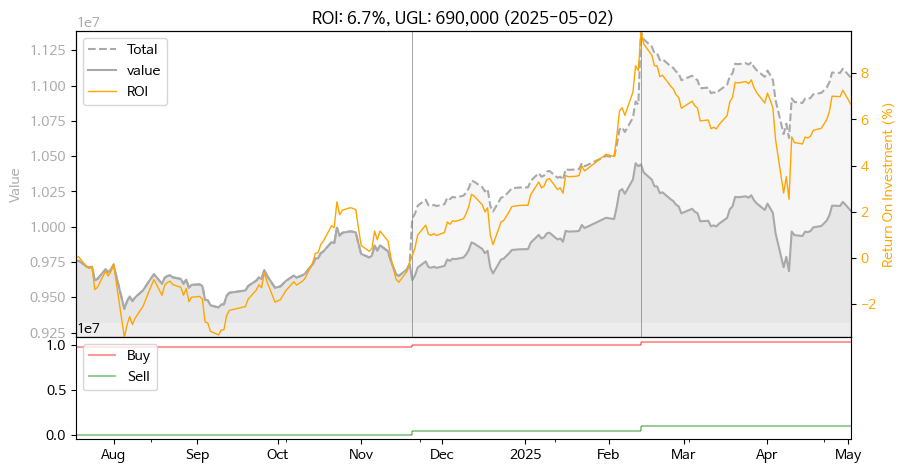

In [34]:
pf_wtr.plot(total=True)

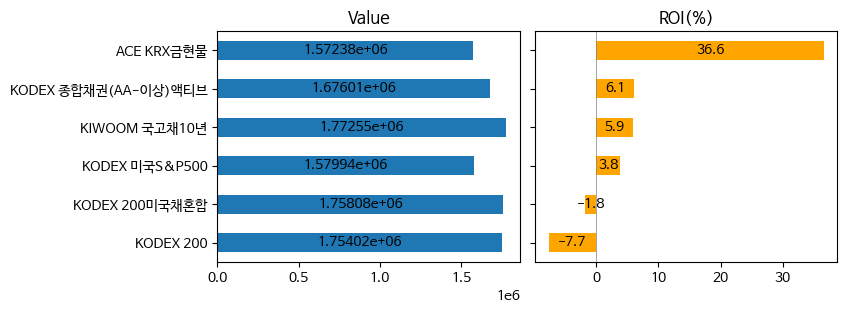

In [35]:
_ = pf_wtr.plot_assets(figsize=(8,3))

In [18]:
date = None
pf_wtr.valuate(date, print_msg=True, join_str=True)

start, end, buy, sell, value, ugl, roi
2024-07-18, 2025-04-25, 10365708, 942797, 10149535, 726624, 0.07009884039350434


start    2024-07-18
end      2025-04-25
buy      10,365,708
sell        942,797
value    10,149,535
ugl         726,624
roi        0.070099
dtype: object

In [89]:
#pf_wtr.get_cash_history(cumsum=False, date_actual=True)

In [90]:
#pf_wtr.performance(metrics=METRICS)

In [91]:
# set kwargs of transaction_pipeline
WidgetTransaction

In [96]:
nshares = True
kwargs = dict(
    date = WidgetTransaction.values(0),
    #capital = WidgetTransaction.values(1),
    capital = -0.1,
    save = WidgetTransaction.values(2),
    nshares = nshares,
    date_actual = date_actual
)
_ = pf_wtr.transaction_pipeline(**kwargs)
pf_wtr.view_record(-2, nshares=nshares)

6 tickers selected by Selected from 2025-04-15 to 2025-04-15
Weights of tickers determined by Equal weights.
Rebalancing by selling 10% of the portfolio value
Mean absolute error of weights: 2 %
ROI: 5.2%, UGL: 542,148 (2025-04-15)
Set save=True to save transaction record


name   price  transaction  net  weight  \
date       ticker                                                           
2025-02-13 069500             KODEX 200   34490            1   51  0.1667   
           148070         KIWOOM 국고채10년  115030            1   15  0.1667   
           273130  KODEX 종합채권(AA-이상)액티브  117125            0   14  0.1667   
           284430        KODEX 200미국채혼합   13090            5  134  0.1667   
           379800        KODEX 미국S&P500   20215            0   86  0.1667   
           411060            ACE KRX금현물   24065          -21   75  0.1667   
2025-04-15 069500             KODEX 200   33355           -6   44  0.1667   
           148070         KIWOOM 국고채10년  117325           -2   12  0.1667   
           273130  KODEX 종합채권(AA-이상)액티브  119085           -2   12  0.1667   
           284430        KODEX 200미국채혼합   12970          -19  115  0.1667   
           379800        KODEX 미국S&P500   17650           -3   84  0.1667   
           411060            ACE KRX금현물   20855           -3   71  0.1667   

                   weight*      date*  
date       ticker                      
2025-02-13 069500    0.168 2025-02-14  
           148070    0.165 2025-02-14  
           273130    0.157 2025-02-14  
           284430    0.168 2025-02-14  
           379800    0.168 2025-02-14  
           411060    0.173 2025-02-14  
2025-04-15 069500    0.168 2025-08-14  
           148070    0.161 2025-08-14  
           273130    0.163 2025-08-14  
           284430    0.170 2025-08-14  
           379800    0.169 2025-08-14  
           411060    0.169 2025-08-14

In [97]:
pf_wtr.valuate(total=False)

,name,start,end,buy,sell,value,ugl,roi
ticker,,,,,,,,
411060,ACE KRX금현물,2024-07-18,2025-04-15,"1,645,718","758,924","1,480,705","593,911",0.360883
148070,KIWOOM 국고채10년,2024-07-18,2025-04-15,"1,783,567","468,849","1,407,900","93,181",0.052244
273130,KODEX 종합채권(AA-이상)액티브,2024-07-18,2025-04-15,"1,579,266","238,089","1,429,020","87,842",0.055622
379800,KODEX 미국S&P500,2024-07-18,2025-04-15,"1,667,165","203,200","1,482,600","18,635",0.011178
284430,KODEX 200미국채혼합,2024-07-18,2025-04-15,"1,790,670","246,346","1,491,550","-52,775",-0.029472
069500,KODEX 200,2024-07-18,2025-04-15,"1,899,321","233,054","1,467,620","-198,647",-0.104588


## LIQ

In [36]:
pf_liq = PM.create_portfolio('LIQ', **kw_cost)

24 securities from 2022-01-03 to 2025-04-30 uploaded.
Price data loaded
Cost data transaction_cost_250501.csv loaded
Transaction record to 2024-01-03 loaded


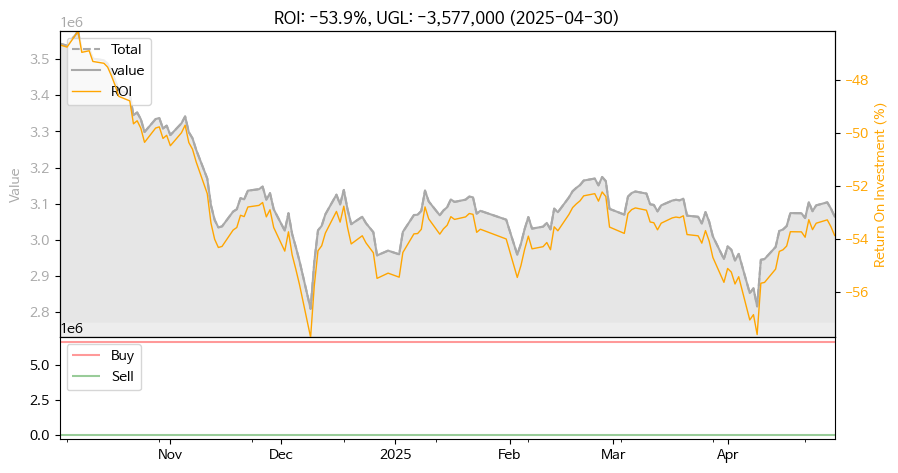

In [37]:
#date=None
date='2024-10-01'
pf_liq.plot(start_date=date)

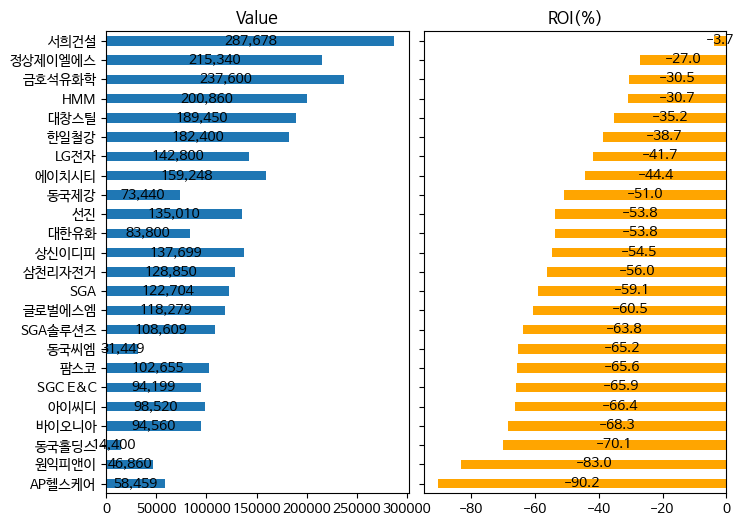

In [38]:
_ = pf_liq.plot_assets(figsize=(8,6))

In [10]:
pf_liq.valuate()

start    2024-01-03
end      2025-04-14
buy       6,642,320
sell            0.0
value     2,965,277
ugl      -3,677,043
roi       -0.553578
dtype: object

In [60]:
#pf_liq.view_record()

## IRP

In [14]:
kw_st = dict(
    security_names = fund_names
)

In [15]:
pf_tdf = PM.create_portfolio('TDF_2406', **kw_st, **kw_cost)
pf_tdf.view_record(-1)

23 securities from 2023-03-29 to 2025-05-07 uploaded.
Master data for 315 funds loaded.
Price data loaded
Cost data transaction_cost_250501.csv loaded
Transaction record to 2025-04-21 loaded


name  ratio  \
date       ticker                                                             
2025-04-21 K55101BV9571             한국투자크레딧포커스ESG증권자투자신탁 1(채권)(C-Re)      1   
           K55206C95800    키움키워드림TDF2030증권투자신탁 1[혼합-재간접형]C-P2e(퇴직연금)      1   
           K55213C50702  한화LIFEPLUSTDF2045증권투자신탁(혼합-재간접형)C-RPE(퇴직연금)      1   
           K55214CD4825                유진챔피언중단기채증권자투자신탁(채권)ClassC-Re      1   
           K55234BY9966                 IBK베트남플러스아시아증권투자신탁[주식]종류C-Re      1   
           K55234DF3150        IBK로우코스트TDF2050증권자투자신탁[혼합-재간접형]종류C-Re      1   
           K55301BU6139              미래에셋전략배분TDF2035혼합자산자투자신탁종류C-P2e      1   
           K55301BU6253             미래에셋전략배분TDF2040혼합자산자투자신탁 종류C-P2e      1   
           K55364CF7048          에셋플러스슈퍼아시아리치투게더증권자투자신탁 1(주식)종류C-P2e      1   

                         transaction      net  weight  weight*      date*  
date       ticker                                                          
2025-04-21 K55101BV9571      6574306  6574306     NaN    0.142 2025-04-21  
           K55206C95800            0  4899682  0.1429    0.106 2024-04-17  
           K55213C50702            0  4823143  0.1429    0.105 2024-04-17  
           K55214CD4825      6574306  6574306     NaN    0.142 2025-04-21  
           K55234BY9966            0  4260709  0.1429    0.092 2024-04-17  
           K55234DF3150            0  4865649  0.1429    0.105 2024-04-17  
           K55301BU6139            0  4837744  0.1429    0.105 2024-04-17  
           K55301BU6253            0  4712837  0.1429    0.102 2024-04-17  
           K55364CF7048            0  4595360  0.1429    0.100 2024-04-17

In [44]:
#pf_tdf.check_universe()

In [45]:
#pf_tdf.portfolio_data['strategy']
#pf_tdf.get_names()

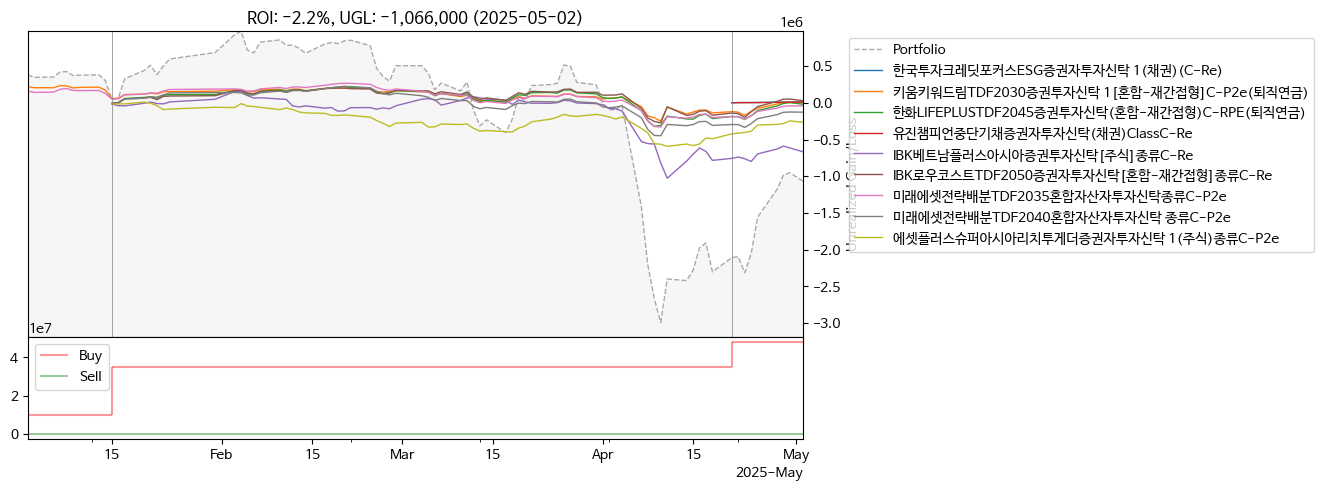

In [48]:
start = '2025-01-01'
pf_tdf.plot(start, total=False, roi=False)

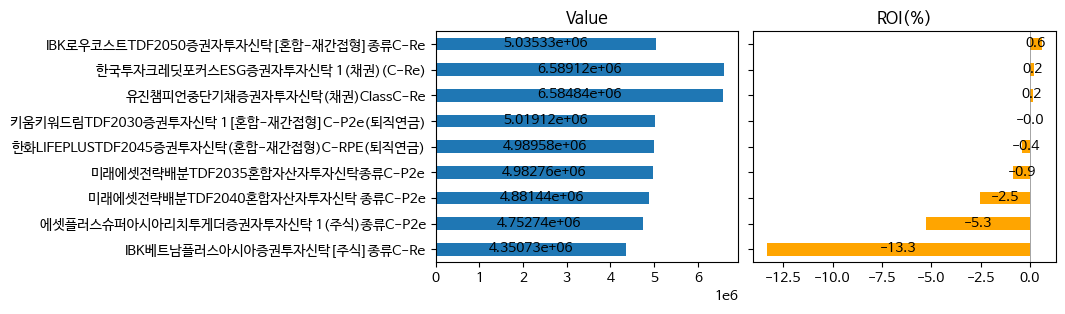

In [49]:
_ = pf_tdf.plot_assets(figsize=(8,3))

In [50]:
date = None
pf_tdf.valuate(date, print_msg=True, join_str=True)
#pf_tdf.valuate(date, total=False)

start, end, buy, sell, value, ugl, roi
2024-06-19, 2025-05-02, 48148612, -102860, 47185650, -1065822, -0.022136089684155147


start    2024-06-19
end      2025-05-02
buy      48,148,612
sell       -102,860
value    47,185,650
ugl      -1,065,822
roi       -0.022136
dtype: object

In [51]:
# set kwargs of transaction_pipeline
WidgetTransaction

In [52]:
# new buy
date_actual='2024-04-17'
kw = dict(
    date = WidgetTransaction.values(0),
    save = WidgetTransaction.values(2),
    date_actual=date_actual,
    buy = {'K55214CD4825': 6574306, 'K55101BV9571':6574306}
)
#_ = pf_tdf.transaction_halt(**kw) 

In [53]:
kwargs = dict(
    date = WidgetTransaction.values(0),
    capital = WidgetTransaction.values(1),
    save = WidgetTransaction.values(2)
)
_ = pf_tdf.transaction_pipeline(**kwargs)

9 tickers selected by Selected from 2025-05-02 to 2025-05-02
Weights of tickers determined by Equal weights.
Rebalancing by selling 0% of the portfolio value (0)
Mean absolute error of weights: 0 %
ROI: -1.8%, UGL: -917,666 (2025-05-02)
Set save=True to save transaction record


In [55]:
pf_tdf.view_record(-1)

name  ratio  \
date       ticker                                                             
2025-05-02 K55101BV9571             한국투자크레딧포커스ESG증권자투자신탁 1(채권)(C-Re)      1   
           K55206C95800    키움키워드림TDF2030증권투자신탁 1[혼합-재간접형]C-P2e(퇴직연금)      1   
           K55213C50702  한화LIFEPLUSTDF2045증권투자신탁(혼합-재간접형)C-RPE(퇴직연금)      1   
           K55214CD4825                유진챔피언중단기채증권자투자신탁(채권)ClassC-Re      1   
           K55234BY9966                 IBK베트남플러스아시아증권투자신탁[주식]종류C-Re      1   
           K55234DF3150        IBK로우코스트TDF2050증권자투자신탁[혼합-재간접형]종류C-Re      1   
           K55301BU6139              미래에셋전략배분TDF2035혼합자산자투자신탁종류C-P2e      1   
           K55301BU6253             미래에셋전략배분TDF2040혼합자산자투자신탁 종류C-P2e      1   
           K55364CF7048          에셋플러스슈퍼아시아리치투게더증권자투자신탁 1(주식)종류C-P2e      1   

                         transaction      net  weight  weight*      date*  
date       ticker                                                          
2025-05-02 K55101BV9571     -1346266  5242850  0.1111    0.111 2025-05-02  
           K55206C95800       116263  5242850  0.1111    0.111 2025-05-02  
           K55213C50702       253272  5242850  0.1111    0.111 2025-05-02  
           K55214CD4825     -1341987  5242850  0.1111    0.111 2025-05-02  
           K55234BY9966       892520  5242850  0.1111    0.111 2025-05-02  
           K55234DF3150       207500  5242850  0.1111    0.111 2025-05-02  
           K55301BU6139       209773  5242850  0.1111    0.111 2025-05-02  
           K55301BU6253       361393  5242850  0.1111    0.111 2025-05-02  
           K55364CF7048       490383  5242850  0.1111    0.111 2025-05-02

## HANA

In [36]:
kw_st = dict(
    #tickers = ['KR5101888398', 'KR5236AS4826', 'KR5370AP9956', 'K55306CV9946']
    method_select = 'selected'    
)

In [37]:
pf_hana = PM.create_portfolio('HANA_2408', **kw_st, **kw_cost)
pf_hana.view_record()

23 securities from 2023-03-29 to 2025-05-07 uploaded.
Master data for 315 funds loaded.
Price data loaded
Cost data transaction_cost_250501.csv loaded
Transaction record to 2024-08-01 loaded


name  ratio  \
date       ticker                                                       
2024-08-01 KR5101888398        한국투자크레딧포커스ESG증권자투자신탁 1(채권)(C-e)      1   
           KR5236AS4826           한국밸류10년투자증권투자신탁 1(채권혼합)종류C-E      1   
           KR5370AP9956           AB글로벌고수익증권투자신탁(채권-재간접형)종류형Ce      1   
           K55306CV9946  다올글로벌멀티에셋인컴EMP증권자투자신탁[혼합-재간접형](공)종류Ce      1   

                         transaction      net  weight  weight*      date*  
date       ticker                                                          
2024-08-01 KR5101888398      5020000  5020000   0.502    0.503 2024-08-01  
           KR5236AS4826      2420000  2420000   0.242    0.242 2024-08-01  
           KR5370AP9956      1860000  1860000   0.186    0.186 2024-08-01  
           K55306CV9946       690000   690000   0.069    0.069 2024-08-01

In [58]:
#pf_hana.portfolio_data['strategy']
#pf_hana.cost
#pf_hana.get_names()

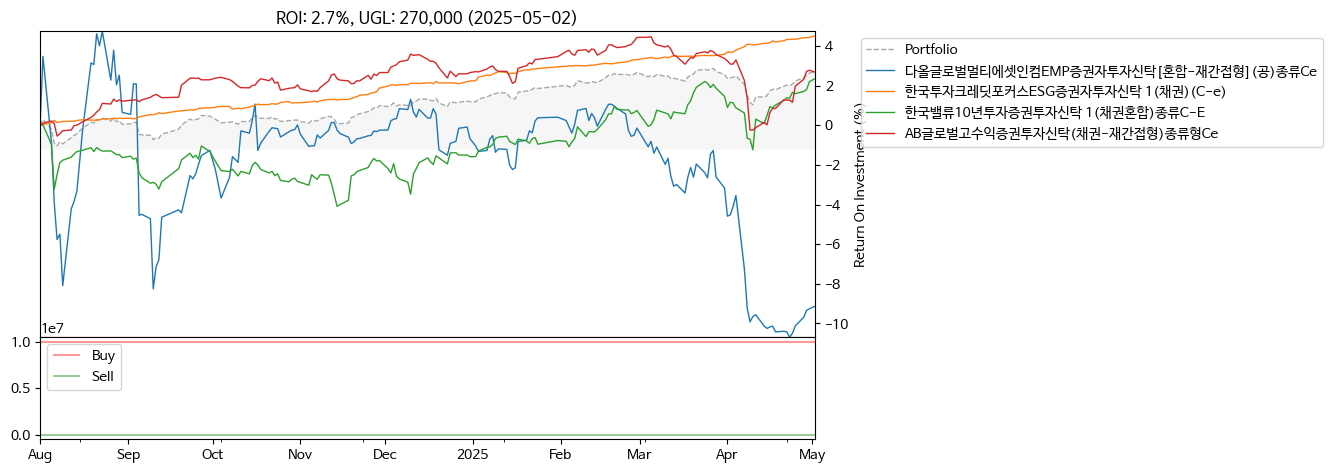

In [59]:
pf_hana.plot(total=False, roi=True)

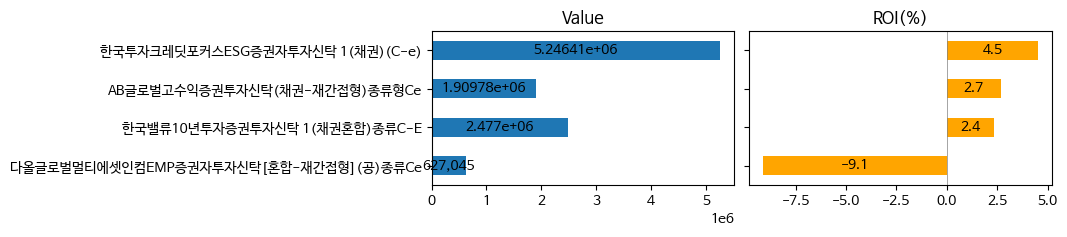

In [60]:
_ = pf_hana.plot_assets(figsize=(8,2), roi=True)

In [19]:
date = None
pf_hana.valuate(date, print_msg=True, join_str=True)

start, end, buy, sell, value, ugl, roi
2024-08-01, 2025-04-17, 9990000, 0.0, 10170781, 180781, 0.01809619619619629


start    2024-08-01
end      2025-04-17
buy       9,990,000
sell            0.0
value    10,170,781
ugl         180,781
roi        0.018096
dtype: object

In [20]:
# set kwargs of transaction_pipeline
WidgetTransaction

In [21]:
kwargs = dict(
    date = WidgetTransaction.values(0),
    capital = WidgetTransaction.values(1),
    save = WidgetTransaction.values(2)
)
_ = pf_hana.transaction_pipeline(**kwargs)
pf_hana.view_record()

4 tickers selected by Selected from 2023-04-17 to 2025-04-17
Weights of tickers determined by Inv.Vol.
Rebalancing by selling 0% of the portfolio value (0)
Mean absolute error of weights: 0 %
ROI: 1.2%, UGL: 140,465 (2025-04-17)
Set save=True to save transaction record


name  ratio  \
date       ticker                                                       
2024-08-01 K55306CV9946  다올글로벌멀티에셋인컴EMP증권자투자신탁[혼합-재간접형](공)종류Ce      1   
           KR5101888398        한국투자크레딧포커스ESG증권자투자신탁 1(채권)(C-e)      1   
           KR5236AS4826           한국밸류10년투자증권투자신탁 1(채권혼합)종류C-E      1   
           KR5370AP9956           AB글로벌고수익증권투자신탁(채권-재간접형)종류형Ce      1   
2025-04-17 K55306CV9946  다올글로벌멀티에셋인컴EMP증권자투자신탁[혼합-재간접형](공)종류Ce      1   
           KR5101888398        한국투자크레딧포커스ESG증권자투자신탁 1(채권)(C-e)      1   
           KR5236AS4826           한국밸류10년투자증권투자신탁 1(채권혼합)종류C-E      1   
           KR5370AP9956           AB글로벌고수익증권투자신탁(채권-재간접형)종류형Ce      1   

                         transaction      net  weight  weight*      date*  
date       ticker                                                          
2024-08-01 K55306CV9946       690000   690000  0.0690    0.069 2024-08-01  
           KR5101888398      5020000  5020000  0.5020    0.503 2024-08-01  
           KR5236AS4826      2420000  2420000  0.2420    0.242 2024-08-01  
           KR5370AP9956      1860000  1860000  0.1860    0.186 2024-08-01  
2025-04-17 K55306CV9946      -217402   402756  0.0396    0.040 2025-04-17  
           KR5101888398      1420535  6653812  0.6542    0.654 2025-04-17  
           KR5236AS4826     -1060218  1381207  0.1358    0.136 2025-04-17  
           KR5370AP9956      -142916  1733003  0.1704    0.170 2025-04-17

## SAVE
연금저축

In [61]:
pf = 'SAVE_2503'
#pf = 'SAVE_2504'

In [62]:
kw_st = dict(
    security_names = fund_names
)

In [63]:
pf_save = PM.create_portfolio(pf, **kw_st, **kw_cost)
pf_save.view_record()

23 securities from 2023-03-29 to 2025-05-02 uploaded.
Master data for 315 funds loaded.
Price data loaded
Cost data transaction_cost_250501.csv loaded
Transaction record to 2025-03-17 loaded


name  ratio  \
date       ticker                                                          
2025-03-17 K55101D20874             한국투자미국배당귀족증권자투자신탁UH(주식)(C-Pe)      1   
           KR5235AK9808        피델리티글로벌배당인컴증권자투자신탁(주식-재간접형)종류PRS-e      1   
           K55307DH1659  유리글로벌Top10주식과단기채증권자투자신탁[채권혼합]_ClassC-P2e      1   
           K55206C11278                    키움더드림단기채증권투자신탁[채권]C-Pe      1   

                         transaction      net  weight  weight*      date*  
date       ticker                                                          
2025-03-17 K55101D20874      1700000  1700000    0.25    0.241 2025-03-13  
           KR5235AK9808      1700000  1700000    0.25    0.241 2025-03-13  
           K55307DH1659      1700000  1700000    0.25    0.241 2025-03-13  
           K55206C11278      1967714  1967714    0.25    0.278 2025-03-13

In [64]:
#pf_save.portfolio_data['strategy']
#pf_save.cost
#pf_save.get_names()
#pf_save.update_record()

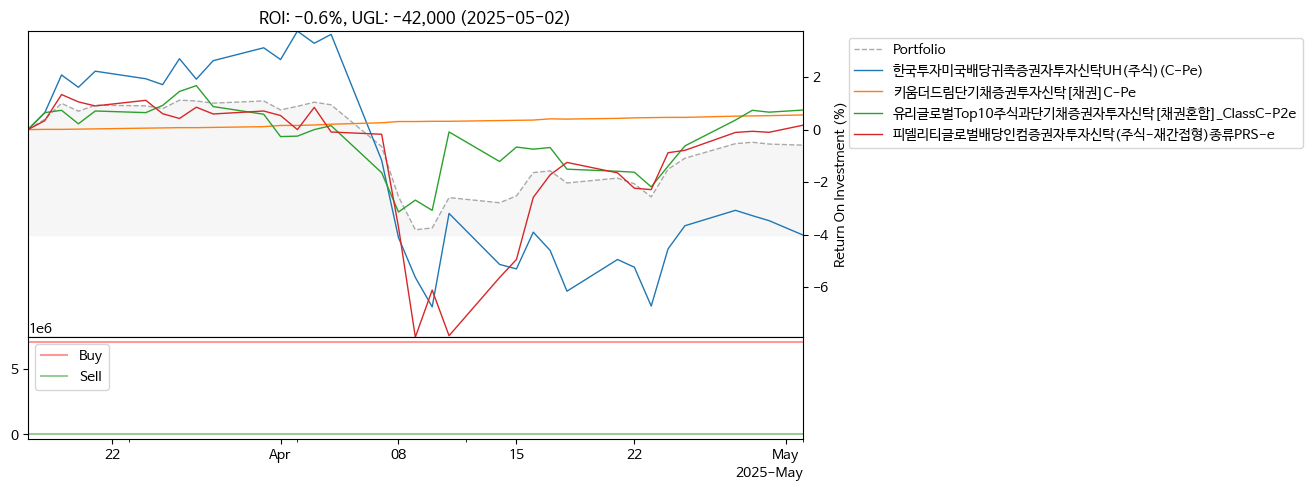

In [65]:
pf_save.plot(total=False, roi=True)

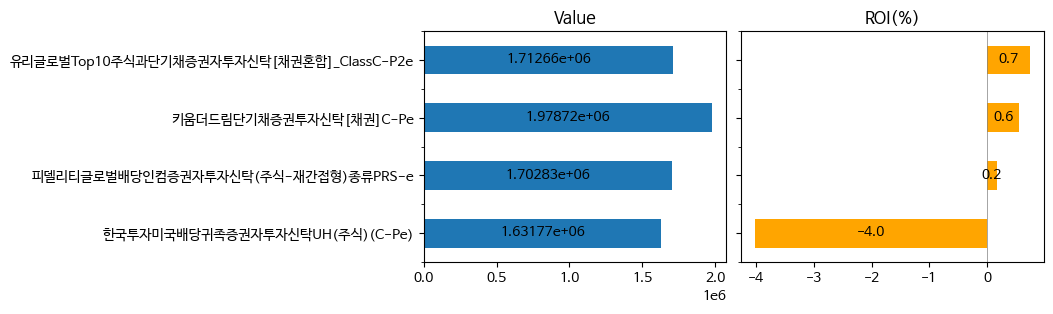

In [66]:
_ = pf_save.plot_assets(figsize=(8,3))

In [26]:
date = None
pf_save.valuate(date, print_msg=True, join_str=True)

start, end, buy, sell, value, ugl, roi
2025-04-21, 2025-04-22, 3584916, 0.0, 3585788, 872.0, 0.00024324140370368674


start    2025-04-21
end      2025-04-22
buy       3,584,916
sell            0.0
value     3,585,788
ugl           872.0
roi        0.000243
dtype: object

In [17]:
# set kwargs of transaction_pipeline
WidgetTransaction

In [27]:
date_actual='2024-04-17'

# new buy
#capital = {'K55107BU0252':2000000, 'K55214B30803':1584916}

capital = WidgetTransaction.values(1)

In [28]:
kwargs = dict(
    date = WidgetTransaction.values(0),
    save = WidgetTransaction.values(2),
    capital = capital,
    date_actual = date_actual
)
_ = pf_save.transaction_pipeline(**kwargs)
pf_save.view_record()

2 tickers selected by Selected from 2024-10-22 to 2025-04-22
Weights of tickers determined by Equal weights.
Rebalancing by selling 0% of the portfolio value (0)
Mean absolute error of weights: 0 %
ROI: 0.0%, UGL: 844.7527020242997 (2025-04-22)
Set save=True to save transaction record


name  ratio  transaction  \
date       ticker                                                               
2025-04-21 K55107BU0252  우리하이플러스채권증권자투자신탁 1(채권)ClassC-P1e      1      2000000   
           K55214B30803      유진챔피언단기채증권자투자신탁(채권)ClassC-Pe      1      1584916   
2025-04-22 K55107BU0252  우리하이플러스채권증권자투자신탁 1(채권)ClassC-P1e      1      -207833   
           K55214B30803      유진챔피언단기채증권자투자신탁(채권)ClassC-Pe      1       207833   

                             net  weight  weight*      date*  
date       ticker                                             
2025-04-21 K55107BU0252  2000000  0.5579    0.558 2025-04-21  
           K55214B30803  1584916  0.4421    0.442 2025-04-21  
2025-04-22 K55107BU0252  1792894  0.5000    0.500 2024-04-17  
           K55214B30803  1792894  0.5000    0.500 2024-04-17

## FISA

In [39]:
kw_st = dict(
    method_select = 'selected'    
)

In [40]:
pf_fisa = PM.create_portfolio('FISA_2504', **kw_st, **kw_cost)
pf_fisa.view_record()

23 securities from 2023-03-29 to 2025-05-07 uploaded.
Master data for 315 funds loaded.
Price data loaded
Cost data transaction_cost_250501.csv loaded
Transaction record to 2025-04-29 loaded


name  ratio  \
date       ticker                                                       
2025-04-28 K55107BB0404               우리단기채권증권투자신탁(채권)ClassA-e      1   
           KR5101888398        한국투자크레딧포커스ESG증권자투자신탁 1(채권)(C-e)      1   
           KR5236AS4818             한국밸류10년투자증권투자신탁 1(주식)종류C-E      1   
2025-04-29 K55107BB0404               우리단기채권증권투자신탁(채권)ClassA-e      1   
           K55210CO3737  신한마음편한TDF2050증권투자신탁[주식혼합-재간접형](종류A-e)      1   
           KR5101888398        한국투자크레딧포커스ESG증권자투자신탁 1(채권)(C-e)      1   
           KR5236AS4818             한국밸류10년투자증권투자신탁 1(주식)종류C-E      1   
           KR5370AP9949           AB글로벌고수익증권투자신탁(채권-재간접형)종류형Ae      1   

                         transaction       net  weight  weight*      date*  
date       ticker                                                           
2025-04-28 K55107BB0404     10000000  10000000  0.3226    0.435 2024-04-25  
           KR5101888398     10000000  10000000  0.3226    0.435 2024-04-25  
           KR5236AS4818      3000000   3000000  0.0968    0.130 2024-04-25  
2025-04-29 K55107BB0404            0  10000934  0.3226    0.323 2024-04-25  
           K55210CO3737      5000000   5000000     NaN    0.161 2025-04-25  
           KR5101888398            0  10000000  0.3226    0.323 2024-04-25  
           KR5236AS4818            0   2990013  0.0968    0.096 2024-04-25  
           KR5370AP9949      3000000   3000000     NaN    0.097 2025-04-25

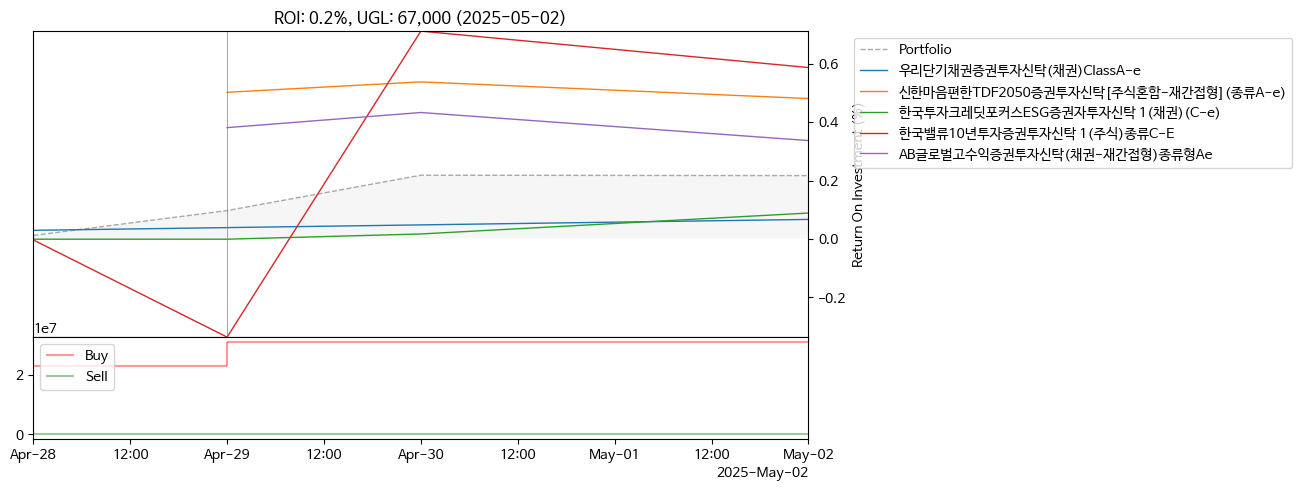

In [16]:
pf_fisa.plot(total=False, roi=True)

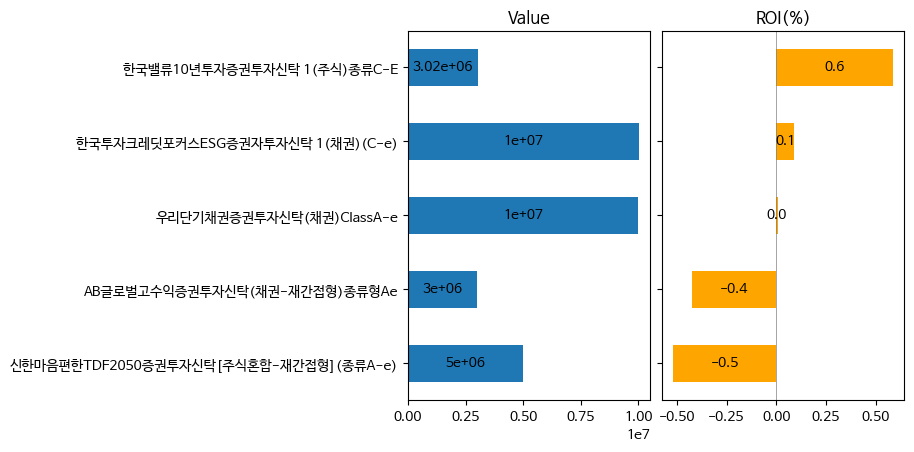

In [13]:
_ = pf_fisa.plot_assets(roi=True)

In [14]:
date = None
pf_fisa.valuate(date, print_msg=True, join_str=True)

start, end, buy, sell, value, ugl, roi
2025-04-28, 2025-05-02, 31039400, -251.59245727645214, 31028035, -11617, -0.00037425312529482113


start    2025-04-28
end      2025-05-02
buy      31,039,400
sell    -251.592457
value    31,028,035
ugl         -11,617
roi       -0.000374
dtype: object

In [23]:
# set kwargs of transaction_pipeline
WidgetTransaction

In [14]:
date_actual='2024-04-25'

# new buy
tickers = ['K55210CO3737','KR5370AP9949']
capital = [5e6, 3e6]
capital = dict(zip(tickers, capital))

kw = dict(
    date = WidgetTransaction.values(0),
    save = WidgetTransaction.values(2),
    date_actual=date_actual,
    buy = capital
)

_ = pf_fisa.transaction_halt(**kw) 
pf_fisa.view_record()

ERROR: No transaction record exits
ERROR: No transaction record


In [16]:
kwargs = dict(
    date = WidgetTransaction.values(0),
    save = WidgetTransaction.values(2),
    capital = WidgetTransaction.values(1),
    #date_actual = date_actual
)
_ = pf_fisa.transaction_pipeline(**kwargs)

23 tickers selected by All from 2024-10-30 to 2025-04-30
Weights of tickers determined by Equal weights.
ERROR: Neither capital nor tickers to rebalance exists


## TEST

In [41]:
tkrs = ['K55303CK1428', 'KR5207AW8081']

In [42]:
PM.review_portfolio('TDF_2406',strategy=True)

{'method_select': 'Selected', 'method_weigh': 'Equally', 'unit_fund': True}

In [43]:
kw_st = dict(
    tickers = tkrs,
    file = 'pf_test'
)
pf_test = PM.create_portfolio('TDF_2406', **kw_st, **kw_cost)

288 securities from 2023-03-27 to 2025-04-23 uploaded.
Master data for 300 funds loaded.
Price data loaded
Cost data transaction_cost_250424.csv loaded
REMINDER: make sure this is 1st transaction as no records provided


In [45]:
# set kwargs of transaction_pipeline
WidgetTransaction

In [50]:
kwargs = dict(
    date = WidgetTransaction.values(0),
    capital = WidgetTransaction.values(1),
    save = WidgetTransaction.values(2)
)
_ = pf_test.transaction_pipeline(**kwargs)
pf_test.view_record()

2 tickers selected by Selected from 2025-01-31 to 2025-01-31
Weights of tickers determined by Equal weights.
Mean absolute error of weights: 0 %
ROI: 1.7%, UGL: 168,854 (2025-04-23)
Set save=True to save transaction record


name  ratio  \
date       ticker                                                       
2025-01-31 K55303CK1428                마이다스우량채권증권자투자신탁 1(채권)Ce      1   
           KR5207AW8081  교보악사Tomorrow장기우량증권투자신탁K -1(채권)ClassCE      1   

                         transaction      net  weight  weight*      date*  
date       ticker                                                          
2025-01-31 K55303CK1428      5000000  5000000     0.5      0.5 2025-01-31  
           KR5207AW8081      5000000  5000000     0.5      0.5 2025-01-31

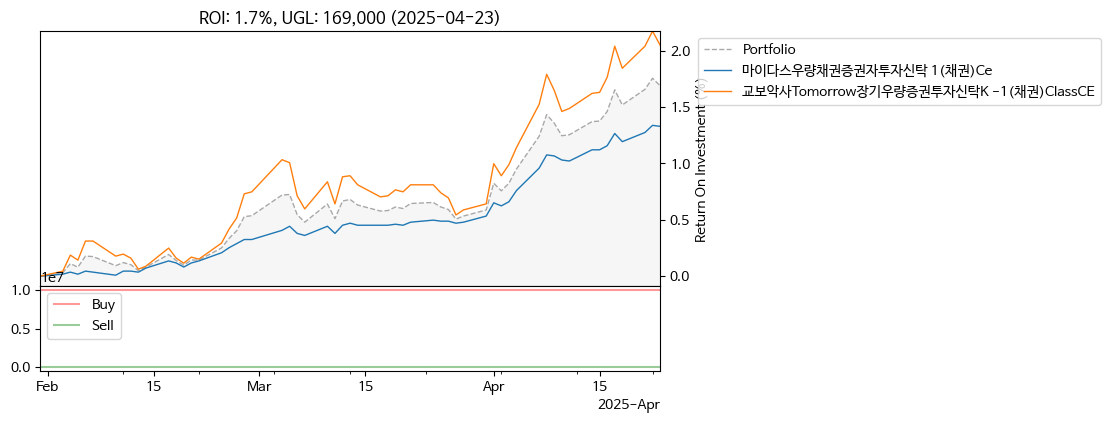

In [51]:
pf_test.plot(total=False, roi=True, figsize=(8,5))

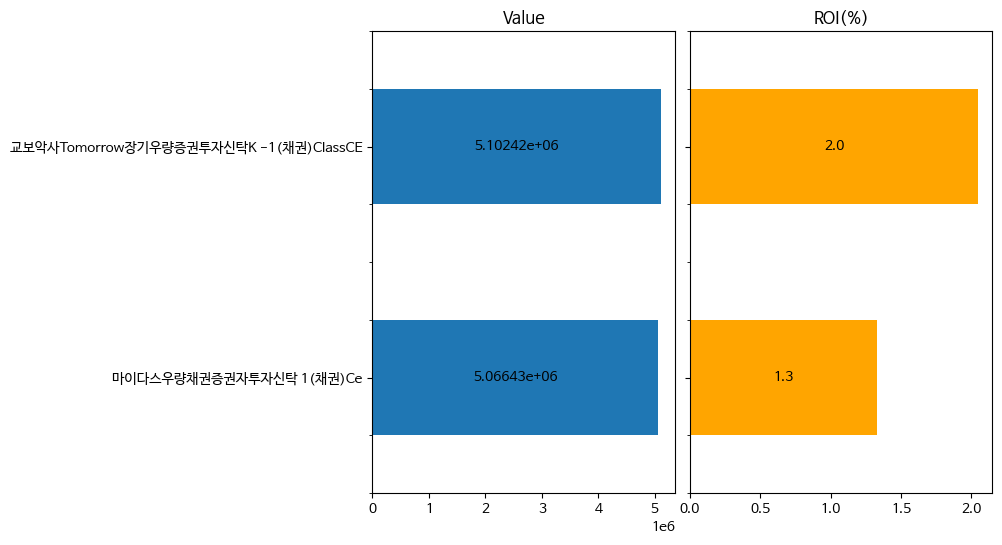

In [52]:
_ = pf_test.plot_assets(figsize=(8,6))

# testing

In [7]:
pf_mmt = PM.create_portfolio('MMT_2407', **kw_cost) 

200 securities from 2022-01-03 to 2025-05-07 uploaded.
Price data loaded
Cost data transaction_cost_250501.csv loaded
Transaction record to 2025-04-16 loaded


In [10]:
#pf_mmt.performance(exclude_cost=False)

In [11]:
#pf_mmt.performance(exclude_cost=True)

In [16]:
pf_tdf.performance(exclude_cost=True)

,TDF_2406
start,2024-06-19
end,2025-05-07
total_return,3.70856
cagr,4.797868
calmar,43.642372
max_drawdown,-0.109936
avg_drawdown,-0.023166
avg_drawdown_days,23.454545
daily_vol,2.649217
daily_sharpe,1.248665


In [17]:
pf_tdf.performance(exclude_cost=False)

,TDF_2406
start,2024-06-19
end,2025-05-07
total_return,3.697681
cagr,4.782674
calmar,43.236602
max_drawdown,-0.110616
avg_drawdown,-0.023376
avg_drawdown_days,23.454545
daily_vol,2.65383
daily_sharpe,1.246958


In [21]:
def performance(self, metrics=METRICS, sort_by=None, exclude_cost=False):
    """
    calc performance of ideal portfolio excluding slippage
    """
    df_rec = self._check_result()
    if df_rec is None:
        return None
    df_prices = self._update_universe(df_rec, msg=True, download_missing=True)
    if df_prices is None:
        return None

    return df_rec, df_prices, exclude_cost
    sr_val = self._calc_value_history(df_rec, df_prices, name=self.name,
                                      total=True, exclude_cost=exclude_cost)
    return sr_val
    if sr_val is None:
        return None
    else:
        return performance_stats(sr_val, metrics=metrics, sort_by=sort_by)

res = performance(pf_tdf, exclude_cost=False)
df_rec, df_prices, exclude_cost = res

self = pf_tdf
sr_val = self._calc_value_history(df_rec, df_prices, name=self.name,
                                  total=True, exclude_cost=exclude_cost)

ERROR: Missing cost data for 1 tickers


In [25]:
self = pf_tdf
sr_val = self._calc_value_history(df_rec, df_prices, name=self.name,
                                  total=True, exclude_cost=True)
self._adjust_value_history(sr_val, total=True)

ERROR: Missing cost data for 1 tickers


date
2024-06-19    10000000
2024-06-20    10036813
2024-06-21    10046714
2024-06-24    10033438
2024-06-25    10014716
                ...   
2025-04-28    47070960
2025-04-29    47267110
2025-04-30    47300615
2025-05-02    47186698
2025-05-07    47085603
Name: TDF_2406, Length: 214, dtype: int64

In [24]:
def _calc_value_history(self, df_rec, df_universe, end_date=None, name=None, msg=False, 
                        total=True, exclude_cost=True):
    """
    calc historical of portfolio value from transaction
    end_date: calc value from 1st transaction of df_rec to end_date.
    name: name of output series
    """
    cols_record = self.cols_record
    col_date = cols_record['date']
    col_rat = cols_record['rat']
    col_net = cols_record['net']
    end = datetime.today() if end_date is None else end_date
    sr_ttl = None
    dates_trs = df_rec.index.get_level_values(0).unique()
    # get number of shares
    sr_nshares = self._get_nshares(df_rec, df_universe, cols_record, int_nshares=False)
    if sr_nshares is None:
        return
    else:
        sr_nshares = sr_nshares[col_net]
    df_unit = df_universe.copy()
    df_unit.loc[:,:] = None
    
    # loop for transaction dates in descending order
    for start in dates_trs.sort_values(ascending=False):
        n_tickers = sr_nshares.loc[start]
        df_c = df_universe.loc[start:end, n_tickers.index]
        if len(df_c) == 0: # no price data from transaction date start
            continue
            
        # get ratio of closed to buy/sell price on transaction date 'start'
        rat_i = df_unit.loc[start:end, n_tickers.index]
        rat_i.loc[start] = df_rec.loc[start, col_rat]
        # calc combined security value history from prv transaction (start) to current (end) 
        sr_i = (df_c.div(rat_i, fill_value=1) # trading price
                    .apply(lambda x: x*n_tickers.loc[x.name])) # x.name: index name
        # concat histories        
        sr_ttl = sr_i if sr_ttl is None else pd.concat([sr_ttl, sr_i])
        end = start - pd.DateOffset(days=1)
    
    if sr_ttl is None:
        return print('ERROR: no historical')
    else:
        sr_ttl = sr_ttl.sort_index()
    
    if total:
        sr_ttl = sr_ttl.fillna(0).sum(axis=1).astype(int)
    else:
        sr_ttl = sr_ttl.stack().dropna().astype(int)
    
    df_val = sr_ttl if name is None else sr_ttl.rename(name)
    return df_val if exclude_cost else self._adjust_value_history(df_val, total=total)


from pf_utils import datetime
import pandas as pd
from pf_utils import get_date_minmax, format_price

self = pf_tdf
_calc_value_history(self, df_rec, df_prices, name=self.name,
                                  total=True, exclude_cost=exclude_cost)

ERROR: Missing cost data for 1 tickers


date
2024-06-19    10000000
2024-06-20    10036813
2024-06-21    10046714
2024-06-24    10033438
2024-06-25    10014716
                ...   
2025-04-28    47070960
2025-04-29    47267110
2025-04-30    47300615
2025-05-02    47186698
2025-05-07    47085603
Name: TDF_2406, Length: 214, dtype: int64

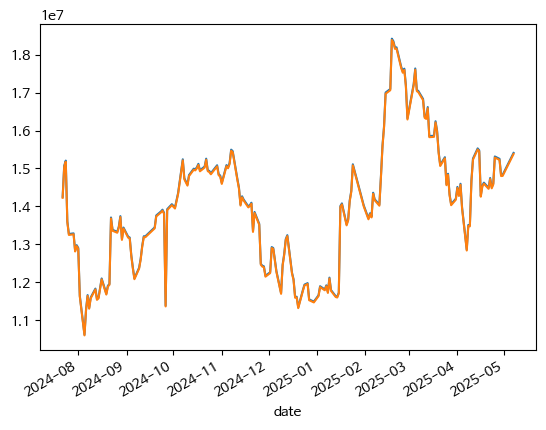

In [23]:
df1 = performance(pf_mmt, exclude_cost=True)
df2 = performance(pf_mmt, exclude_cost=False)

ax = df1.plot()
_ = df2.plot(ax=ax)

In [7]:
date = None
#date = '2025-01-17'
pf_mmt.valuate(date, print_msg=True, join_str=True, exclude_cost=False, total=False)

,name,start,end,buy,sell,value,ugl,roi
ticker,,,,,,,,
012450,한화에어로스페이스,2024-08-22,2025-05-07,"8,041,998","8,636,612","2,665,000","3,259,613",0.4050
003230,삼양식품,2024-07-22,2025-05-07,"4,577,833","2,938,594","2,844,663","1,205,423",0.2630
329180,HD현대중공업,2025-04-16,2025-05-07,"2,911,894",0.0,"3,317,775","405,881",0.1390
042660,한화오션,2025-03-14,2025-05-07,"3,444,625","467,739","3,129,728","152,843",0.0444
064350,현대로템,2024-11-11,2025-05-07,"6,612,059","2,747,745","3,424,275","-440,040",-0.0666
000150,두산,2024-07-22,2025-04-16,"8,386,945","7,577,858",0.0,"-809,086",-0.0965


In [15]:
def valuate(self, date=None, total=True, exclude_cost=True, exclude_sold=True,
            print_msg=False, print_summary_only=False,
            sort_by='ugl', int_to_str=True, join_str=False):
    """
    calc date, buy/sell prices & portfolio value from self.record or self.df_rec
    date: date, None, 'all'
    exclude_sold: set to True to exclude assets that are no longer held when calculating individual asset performance.
        effective when date!='all' & total=False
    sort_by: sort value of date (total=False) by one of 'start', 'end', 'buy', 'sell', 
            'value', 'ugl', 'roi' in descending order
    int_to_str: applied only if date != 'all'
    join_str: applied only if date != 'all' and total==True
    """
    if print_summary_only:
        print_msg = False # force no print except print_summary_only case

    # get latest record
    df_rec = self._check_result(print_msg)
    if df_rec is None:
        return None

    if isinstance(date, str) and date.lower() == 'all':
        date = None
        history = True
    else:
        history = False

    date_format = self.date_format
    cols_record = self.cols_record
    col_date = cols_record['date']
    col_tkr = cols_record['tkr']
    col_net = cols_record['net']
    col_roi = 'roi'
    col_ugl = 'ugl'
    col_start, col_end = 'start', 'end'
    col_val = 'value'

    # check date by price data
    df_prices = self._update_universe(df_rec, msg=print_msg, download_missing=True)
    if df_prices is None:
        return None
    date = df_prices.loc[:date].index.max() # works even if date None
    date_ft = df_rec.index.get_level_values(0).min()
    if date_ft > date:
        dt = date.strftime(date_format)
        return print(f'ERROR: No transaction before {dt}') if print_msg else None
    else:
        # convert dates to str for series as no more comparison
        date_ft, date = [x.strftime(date_format) for x in (date_ft, date)]
            
    # get record to date
    df_rec = df_rec.loc[:date]

    #return df_rec, df_prices, date, self.name, total, exclude_cost
    
    # calc value
    sr_val = self._calc_value_history(df_rec, df_prices, date, self.name, msg=False, 
                                      total=total, exclude_cost=exclude_cost)
    # buy & sell prices to date.
    df_cf = self._calc_cashflow_history(df_rec, total=total, exclude_cost=exclude_cost)

    # calc profit
    df_pnl = self._calc_profit(sr_val, df_cf, result='all')
    
    if total:
        df_m = df_cf.join(sr_val.rename('value'), how='right').join(df_pnl).ffill()
    else:
        df_m = self._join_cashflow_by_ticker(sr_val, df_cf, df_pnl)
    df_m = df_m.dropna(how='all')

    if not history:
        if total:
            start = df_m.index.get_level_values(col_date).min().strftime(date_format)
            sr = pd.Series([start, date], index=[col_start, col_end])
            sr_m = pd.concat([sr, df_m.loc[date]]) # concat data range
            df_m = sr_m.apply(format_price, digits=0) if int_to_str else sr_m
            if print_msg or print_summary_only:
                if join_str:
                    sr = sr_m.apply(format_price, digits=0, int_to_str=False)
                    idx = ', '.join(sr.index)
                    to_print = ', '.join(map(str, sr.to_list()))
                    to_print = f'{idx}\n{to_print}'
                else:
                    to_print = PortfolioBuilder.get_title_pnl(df_m[col_roi], df_m[col_ugl], date)
                print(to_print) 
        else:
            # get periods of holding for each assets
            df_r = df_m.groupby(col_tkr).apply(lambda x: pd.Series(get_date_minmax(x.dropna()), index=[col_start, col_end]))
            # update end date of assets liquidated on the latest transaction
            date_lt = df_rec.index.get_level_values(col_date).max()
            sr_net = df_rec.loc[date_lt, col_net]
            tkrs = sr_net.loc[sr_net == 0].index
            if tkrs.size > 0:
                df_r.loc[tkrs, col_end] = date_lt
            # add periods to performance data
            df_m = pd.concat([df_r, df_m.loc[date]], axis=1)
            df_m = df_m.sort_values(sort_by, ascending=False) if sort_by else df_m

            return df_m
            
            df_m = df_m.map(format_price, digits=0) if int_to_str else df_m
            # remove past (disposed) assets if exclude_sod = True
            df_m = df_m.loc[df_m[col_val].notna()] if exclude_sold else df_m
            # add asset name column if given
            if self.security_names is not None: 
                col_name = cols_record['name']
                cols = df_m.columns
                df_m = df_m.join(pd.Series(self.security_names, name=col_name))
                df_m = df_m[cols.insert(0, col_name)]
    return df_m

import pandas as pd
from pf_utils import get_date_minmax, format_price

In [16]:
df_m = valuate(pf_mmt, date, print_msg=True, join_str=True, exclude_cost=False, total=False)
df_m.map(format_price, digits=0)

ValueError: cannot convert float NaN to integer

In [17]:
df_m

,start,end,buy,sell,value,ugl,roi
ticker,,,,,,,
012450,2024-08-22,2025-05-07,8.041998e+06,8.636612e+06,2.665000e+06,3.259613e+06,0.405324
003230,2024-07-22,2025-05-07,4.577833e+06,2.938594e+06,2.844663e+06,1.205423e+06,0.263317
329180,2025-04-16,2025-05-07,2.911894e+06,0.000000e+00,3.317775e+06,4.058808e+05,0.139387
267260,2024-07-22,2025-04-15,3.560870e+06,3.908809e+06,NaN,3.479383e+05,0.097712
079550,2024-08-22,2025-01-15,2.701902e+06,2.855946e+06,NaN,1.540440e+05,0.057013
042660,2025-03-14,2025-05-07,3.444625e+06,4.677395e+05,3.129728e+06,1.528425e+05,0.044371
489790,2024-09-27,2024-11-08,2.816987e+05,3.534996e+05,NaN,7.180089e+04,0.254885
298040,2024-12-16,2025-04-15,5.646294e+06,5.650604e+06,NaN,4.309672e+03,0.000763
064350,2024-11-11,2025-05-07,6.612059e+06,2.747745e+06,3.424275e+06,-4.400396e+05,-0.066551


In [21]:
def format_price(x, digits=3, min_x=1000, sig_figs=3, int_to_str=True):
    """
    Formats a number by rounding and optionally converting it to a string with comma separators.
    """
    if isinstance(x, Number):
        if abs(x) >= min_x:
            y = int(round(x, -digits))
            y = f'{y:,.0f}' if int_to_str else y
        elif abs(x) > 0:
            y = round(x, -int(math.floor(math.log10(abs(x)))) + (sig_figs - 1))
        else:
            y = x
    else:
        y = x
    return y

from numbers import Number
import math
df_m.map(format_price, digits=0)

,start,end,buy,sell,value,ugl,roi
ticker,,,,,,,
012450,2024-08-22,2025-05-07,"8,041,998","8,636,612","2,665,000","3,259,613",0.405000
003230,2024-07-22,2025-05-07,"4,577,833","2,938,594","2,844,663","1,205,423",0.263000
329180,2025-04-16,2025-05-07,"2,911,894",0.0,"3,317,775","405,881",0.139000
267260,2024-07-22,2025-04-15,"3,560,870","3,908,809",NaN,"347,938",0.097700
079550,2024-08-22,2025-01-15,"2,701,902","2,855,946",NaN,"154,044",0.057000
042660,2025-03-14,2025-05-07,"3,444,625","467,739","3,129,728","152,843",0.044400
489790,2024-09-27,2024-11-08,"281,699","353,500",NaN,"71,801",0.255000
298040,2024-12-16,2025-04-15,"5,646,294","5,650,604",NaN,"4,310",0.000763
064350,2024-11-11,2025-05-07,"6,612,059","2,747,745","3,424,275","-440,040",-0.066600


In [15]:
res = valuate(pf_mmt, date, print_msg=True, join_str=True, exclude_cost=False, total=False)
df_rec, df_prices, date, name, total, exclude_cost = res
    
self = pf_mmt
#sr_val = self._calc_value_history(df_rec, df_prices, date, name, msg=False, 
res = _calc_value_history(self, df_rec, df_prices, date, name, msg=False, 
                                  total=total, exclude_cost=exclude_cost)
df_val, exclude_cost, total = res
self._adjust_value_history(df_val, total=total)

IntCastingNaNError: Cannot convert non-finite values (NA or inf) to integer

In [18]:
from pf_utils import CostManager
self = pf_mmt
cost = self.cost or dict()
kw = dict(period=3, percent=True, **cost)
CostManager.get_history_with_fee(df_val.unstack('ticker'), **kw)

IntCastingNaNError: Cannot convert non-finite values (NA or inf) to integer

In [19]:
df_val.unstack('ticker')

ticker,000150,003230,012450,042660,064350,329180,010120,267260,298040,010130,079550,011790,042700,489790
date,,,,,,,,,,,,,,
2024-07-22,2600000.0,3185000.0,NaN,NaN,NaN,NaN,2664000.0,2826000.0,NaN,NaN,NaN,NaN,2980000.0,NaN
2024-07-23,2645500.0,3295000.0,NaN,NaN,NaN,NaN,3107999.0,3114000.0,NaN,NaN,NaN,NaN,2910000.0,NaN
2024-07-24,2535000.0,3395000.0,NaN,NaN,NaN,NaN,3119999.0,3289500.0,NaN,NaN,NaN,NaN,2868000.0,NaN
2024-07-25,2236000.0,3070000.0,NaN,NaN,NaN,NaN,2585999.0,3010500.0,NaN,NaN,NaN,NaN,2710000.0,NaN
2024-07-26,2124200.0,3115000.0,NaN,NaN,NaN,NaN,2405999.0,2880000.0,NaN,NaN,NaN,NaN,2750000.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2025-04-28,0.0,2847000.0,2481000.0,3482700.0,3248000.0,3196000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2025-04-29,0.0,2946000.0,2427000.0,3061500.0,3166800.0,3228000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2025-04-30,0.0,2910000.0,2391000.0,3061500.0,3253800.0,3216000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## testing

In [8]:
import pandas as pd

In [21]:
portfolios_fund = ['TDF','HANA','SAVE', 'FISA']
#portfolios_fund = ['MMT','WTR']

In [22]:
pm = PM(*portfolios_fund, verbose=False, **kw_cost)
pm.summary()

TDF_2406: done
HANA_2408: done
SAVE_2503: done
SAVE_2504: done
FISA_2504: done


portfolio,FISA_2504,HANA_2408,SAVE_2503,SAVE_2504,TDF_2406,TOTAL
start,2025-04-28,2024-08-01,2025-03-17,2025-04-21,2024-06-19,2024-06-19
end,2025-05-07,2025-05-07,2025-05-07,2025-05-07,2025-05-07,2025-05-07
buy,"30,960,600","9,990,000","7,067,714","3,584,916","48,148,612","99,751,842"
sell,-252.0,0.0,0.0,0.0,"-102,860","-103,112"
value,"30,937,786","10,194,239","7,018,114","3,588,565","46,913,800","98,652,504"
ugl,"-23,066","204,239","-49,600","3,649","-1,337,672","-1,202,450"
roi,-0.000745,0.0204,-0.00702,0.00102,-0.0278,-0.0121


In [23]:
pm.summary(exclude_cost=True)

portfolio,FISA_2504,HANA_2408,SAVE_2503,SAVE_2504,TDF_2406,TOTAL
start,2025-04-28,2024-08-01,2025-03-17,2025-04-21,2024-06-19,2024-06-19
end,2025-05-07,2025-05-07,2025-05-07,2025-05-07,2025-05-07,2025-05-07
buy,"31,000,000","9,990,000","7,067,714","3,584,916","48,148,612","99,791,242"
sell,0.0,0.0,0.0,0.0,0.0,0.0
value,"31,011,902","10,251,175","7,027,320","3,591,052","47,085,599","98,967,048"
ugl,"11,902","261,175","-40,394","6,136","-1,063,013","-824,194"
roi,0.000384,0.0261,-0.00572,0.00171,-0.0221,-0.00826


In [13]:
pm.util_performance_by_asset()

IntCastingNaNError: Cannot convert non-finite values (NA or inf) to integer

In [16]:
def util_performance_by_asset(self, *pf_names, date=None, exclude_cost=False):
    """
    get ticker list of assets in all portfolios
    """
    pf_names = self.check_portfolios(*pf_names)
    if len(pf_names) == 0:
        return None

    return pf_names, date, exclude_cost
    df_all = self._performance_by_asset(*pf_names, date=date, exclude_cost=exclude_cost)
    return df_all


def _performance_by_asset(self, *pf_names, date=None, exclude_cost=False):
    """
    pf_names: list of portfolio names
    date: date for values on date, None for values on last date, 'all' for history
    """
    # get data from each portfolio
    df_all = None
    # custom category not supported for history
    total = True if date == 'all' else False
    no_res = []
    for name in pf_names:
        pf = self.portfolios[name]
        df = pf.valuate(date=date, total=total, exclude_cost=exclude_cost, 
                        exclude_sold=False, # Including all historical assets to calculate total profit
                        int_to_str=False, print_msg=False) 
        if df is None:
            no_res.append(name)
        else:
            # add portfolio name
            df = df.assign(**{self.col_portfolio:name})
            df_all = df if df_all is None else pd.concat([df_all, df], axis=0) 
    return df_all


res = util_performance_by_asset(pm)
pf_names, date, exclude_cost = res

res = _performance_by_asset(pm, *pf_names, date, exclude_cost)

IntCastingNaNError: Cannot convert non-finite values (NA or inf) to integer

In [ ]:
self = pm
df_val = self._valuate(*pf_names, date=date, category=category, exclude_cost=exclude_cost)

IntCastingNaNError: Cannot convert non-finite values (NA or inf) to integer

In [21]:
pm = PM(*portfolios_fund,  **kw_cost, verbose=False)
pm.summary()

TDF_2406: done
HANA_2408: done
SAVE_2503: done
SAVE_2504: done
FISA_2504: done


portfolio,FISA_2504,HANA_2408,SAVE_2503,SAVE_2504,TDF_2406,TOTAL
start,2025-04-28,2024-08-01,2025-03-17,2025-04-21,2024-06-19,2024-06-19
end,2025-05-02,2025-05-02,2025-05-02,2025-05-02,2025-05-02,2025-05-02
buy,"30,960,600","9,990,000","7,067,714","3,584,916","48,148,612","99,751,842"
sell,-251.592457,0.0,0.0,0.0,"-102,860","-103,112"
value,"31,028,033","10,260,233","7,025,973","3,589,744","47,185,646","99,089,629"
ugl,"67,181","270,233","-41,741","4,828","-1,065,826","-765,325"
roi,0.00217,0.02705,-0.005906,0.001347,-0.022136,-0.007672


In [22]:
31028033 - 251.592457 - 30960600

67181.40754299983

In [23]:
pf_fisa.valuate()

start    2025-04-28
end      2025-05-02
buy      30,960,600
sell    -251.592457
value    31,028,035
ugl          67,183
roi         0.00217
dtype: object

In [31]:
def valuate(self, date=None, cost_excluded=False, total=True, exclude_sold=True,
            print_msg=False, print_summary_only=False,
            sort_by='ugl', int_to_str=True, join_str=False):
    """
    calc date, buy/sell prices & portfolio value from self.record or self.df_rec
    date: date, None, 'all'
    exclude_sold: set to True to exclude assets that are no longer held when calculating individual asset performance.
        effective when date!='all' & total=False
    sort_by: sort value of date (total=False) by one of 'start', 'end', 'buy', 'sell', 
            'value', 'ugl', 'roi' in descending order
    int_to_str: applied only if date != 'all'
    join_str: applied only if date != 'all' and total==True
    """
    if print_summary_only:
        print_msg = False # force no print except print_summary_only case

    # get latest record
    df_rec = self._check_result(print_msg)
    if df_rec is None:
        return None

    if isinstance(date, str) and date.lower() == 'all':
        date = None
        history = True
    else:
        history = False

    date_format = self.date_format
    cols_record = self.cols_record
    col_date = cols_record['date']
    col_tkr = cols_record['tkr']
    col_net = cols_record['net']
    col_roi = 'roi'
    col_ugl = 'ugl'
    col_start, col_end = 'start', 'end'
    col_val = 'value'

    # check date by price data
    df_prices = self._update_universe(df_rec, msg=print_msg, download_missing=True)
    if df_prices is None:
        return None
    date = df_prices.loc[:date].index.max() # works even if date None
    date_ft = df_rec.index.get_level_values(0).min()
    if date_ft > date:
        dt = date.strftime(date_format)
        return print(f'ERROR: No transaction before {dt}') if print_msg else None
    else:
        # convert dates to str for series as no more comparison
        date_ft, date = [x.strftime(date_format) for x in (date_ft, date)]
            
    # get record to date
    df_rec = df_rec.loc[:date]
    # calc value
    sr_val = self._calc_value_history(df_rec, df_prices, date, self.name, msg=False, total=total)
    return sr_val
    
    # buy & sell prices to date.
    cost = None if cost_excluded else self.cost

    #return df_rec, cost, total # testing
    df_cf = self._calc_cashflow_history(df_rec, cost, total=total)

    # calc profit
    df_pnl = self._calc_profit(sr_val, df_cf, result='all')
    
    if total:
        df_m = df_cf.join(sr_val.rename('value'), how='right').join(df_pnl).ffill()
    else:
        df_m = self._join_cashflow_by_ticker(sr_val, df_cf, df_pnl)
    df_m = df_m.dropna(how='all')
    return df_m

In [48]:
#valuate(pf_fisa, total=False)
df_rec = valuate(pf_mmt, total=False).to_frame('transaction')
df_rec.head()

transaction
date       ticker             
2024-07-22 000150      2600000
           003230      3185000
           010120      2664000
           267260      2826000
           042700      2980000

In [38]:
#pf_mmt.cost
pf_fisa.cost.keys()

dict_keys(['buy', 'sell', 'fee', 'tax'])

In [50]:
from pf_utils import CostManager as CM

#df_rec = pf_mmt.record[['transaction']]
df_rec = valuate(pf_mmt, total=False).to_frame('transaction').mul(-1)

cols_record = pf_mmt.cols_record
transaction = 'sell'
commission = pf_mmt.cost[transaction]

CM._calc_fee_trading(df_rec, cols_record, commission, transaction)

date        ticker
2024-07-22  000150     9462.96000
            003230    11592.12600
            010120     9695.89440
            267260    10285.50960
            042700    10846.00800
                         ...     
2025-05-02  003230    10787.77440
            012450     8931.57840
            042660    11199.41316
            064350    11768.64660
            329180    11894.21280
Name: sell, Length: 949, dtype: float64

In [43]:
df_rec = pf_mmt.record
cols_record = pf_mmt.cols_record
transaction = 'sell'
commission = pf_mmt.cost[transaction]

CM._calc_fee_trading(df_rec, cols_record, commission, transaction)

date        ticker
2024-08-22  000150     6983.66448
            010120     7616.95488
            267260     1157.39280
2024-09-26  012450    10281.87000
2024-10-08  042700     8262.25596
            079550     2658.72780
            489790     1288.96434
2024-11-11  003230     2049.09480
            011790     8891.17884
            012450     2937.15720
2024-12-16  003230     5306.53680
            012450     7834.24264
            064350     8429.31360
            079550     7754.89572
            267260     1417.62420
2025-01-16  010130     6209.15760
            298040     8553.06000
2025-02-14  000150    11737.71000
            010120      866.22480
            012450     2103.69244
2025-03-14  003230     3359.35080
            010120    10623.99240
            012450     5466.67920
            267260    11677.65660
            298040    12050.71560
2025-04-16  000150     8909.74080
            012450     2868.00116
            042660     1705.51656
            064350     1589.7

In [20]:
valuate(pf_fisa, cost_excluded=True)

date
2025-04-28    23000000
2025-04-29    30990947
2025-04-30    31028453
2025-05-02    31028035
Name: FISA_2504, dtype: int64

In [14]:
res = valuate(pf_fisa)
df_rec, cost, total = res
pf_fisa._calc_cashflow_history(df_rec, cost, total=total)

TypeError: cannot unpack non-iterable NoneType object

In [ ]:
from pf_utils import CostManager
self = pf_fisa
df_rec = self.view_record(0, df_rec=df_rec, nshares=False, value=True, 
                          weight_actual=False, msg=False, int_nshares=False)
cm = CostManager(df_rec, self.cols_record, self.date_format)
cm.calc_cashflow_history(cost=cost, total=total)

,buy,sell
date,,
2025-04-28,23003000.0,-251.592457
2025-04-29,31039400.0,-251.592457


In [28]:
df_rec

name  ratio  \
date       ticker                                                       
2025-04-28 K55107BB0404               우리단기채권증권투자신탁(채권)ClassA-e      1   
           KR5101888398        한국투자크레딧포커스ESG증권자투자신탁 1(채권)(C-e)      1   
           KR5236AS4818             한국밸류10년투자증권투자신탁 1(주식)종류C-E      1   
2025-04-29 K55107BB0404               우리단기채권증권투자신탁(채권)ClassA-e      1   
           K55210CO3737  신한마음편한TDF2050증권투자신탁[주식혼합-재간접형](종류A-e)      1   
           KR5101888398        한국투자크레딧포커스ESG증권자투자신탁 1(채권)(C-e)      1   
           KR5236AS4818             한국밸류10년투자증권투자신탁 1(주식)종류C-E      1   
           KR5370AP9949           AB글로벌고수익증권투자신탁(채권-재간접형)종류형Ae      1   

                         transaction       net  weight      date*  price  
date       ticker                                                         
2025-04-28 K55107BB0404     10000000  10000000  0.3226 2024-04-25    NaN  
           KR5101888398     10000000  10000000  0.3226 2024-04-25    NaN  
           KR5236AS4818      3000000   3000000  0.0968 2024-04-25    NaN  
2025-04-29 K55107BB0404            0  10000934  0.3226 2024-04-25    NaN  
           K55210CO3737      5000000   5000000     NaN 2025-04-25    NaN  
           KR5101888398            0  10000000  0.3226 2024-04-25    NaN  
           KR5236AS4818            0   2990013  0.0968 2024-04-25    NaN  
           KR5370AP9949      3000000   3000000     NaN 2025-04-25    NaN

In [ ]:
# calc profit
df_pnl = self._calc_profit(sr_val, df_cf, result='all')

if total:
    df_m = df_cf.join(sr_val.rename('value'), how='right').join(df_pnl).ffill()
else:
    df_m = self._join_cashflow_by_ticker(sr_val, df_cf, df_pnl)
df_m = df_m.dropna(how='all')
df_m

,buy,sell,value,ugl,roi
date,,,,,
2025-04-28,23003000.0,-251.592457,23000000,-3251.592457,-0.000141
2025-04-29,31039400.0,-251.592457,30990947,-48704.592457,-0.001569
2025-04-30,31039400.0,-251.592457,31028453,-11198.592457,-0.000361
2025-05-02,31039400.0,-251.592457,31028035,-11616.592457,-0.000374


In [25]:
pf_fisa.valuate()

start    2025-04-28
end      2025-05-02
buy      31,039,400
sell    -251.592457
value    31,028,035
ugl         -11,617
roi       -0.000374
dtype: object

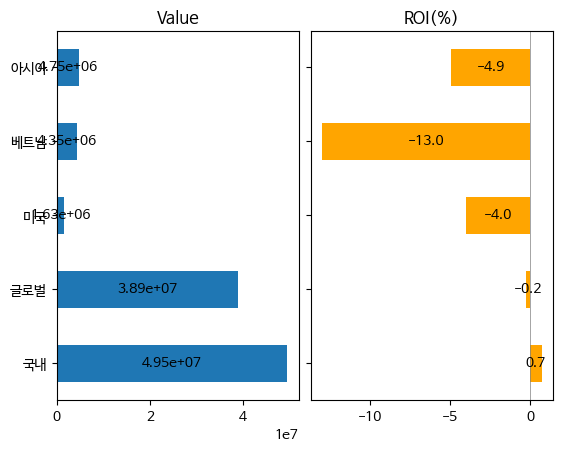

In [81]:
pm.summary(plot=True, category='region')

In [82]:
pm.summary(date='2025-05-02', int_to_str=False)

portfolio,FISA_2504,HANA_2408,SAVE_2503,SAVE_2504,TDF_2406,TOTAL
start,2025-04-28,2024-08-01,2025-03-17,2025-04-21,2024-06-19,2024-06-19
end,2025-05-02,2025-05-02,2025-05-02,2025-05-02,2025-05-02,2025-05-02
buy,31000000.0,9990000.0,7067714.0,3584916.0,48148612.0,99791242.0
sell,0.0,0.0,0.0,0.0,0.0,0.0
value,31028033,10260233,7025973,3589744,47185646,99089629
ugl,28033.0,270233.0,-41741.0,4828.0,-962966.0,-701613.0
roi,0.000904,0.02705,-0.005906,0.001347,-0.02,-0.007031


In [37]:
pf = pm.portfolios.keys()
#pm._valuate(*pf, date='all', category='region')
pm._valuate(*pf, category='region')
#_valuate(pm, *pf, date='all')
#_valuate(pm, *pf)

,start,end,buy,sell,value,ugl,roi
portfolio,,,,,,,
FISA_2504,2025-04-28,2025-05-02,31000000.0,0.0,31028033,28033.0,0.000904
HANA_2408,2024-08-01,2025-05-02,9990000.0,0.0,10260233,270233.0,0.027050
SAVE_2503,2025-03-17,2025-05-02,7067714.0,0.0,7025973,-41741.0,-0.005906
SAVE_2504,2025-04-21,2025-05-02,3584916.0,0.0,3589744,4828.0,0.001347
TDF_2406,2024-06-19,2025-05-02,48148612.0,0.0,47185646,-962966.0,-0.020000


In [ ]:
pm._valuate(*pf, category='name')

In [85]:
from pf_utils import PortfolioManager


class PortfolioManager(PortfolioManager):
    def _valuate(self, *pf_names, date=None, category=None, format_date='%Y-%m-%d'):
        """
        return evaluation summary df the portfolios in pf_names
        pf_names: list of portfolio names
        date: date for values on date, None for values on last date, 'all' for history
        """
        df_cat = self.df_category
        col_portfolio = self.col_portfolio
        col_ticker = self.col_ticker
        nms_v = self.names_vals
        nm_val = nms_v['value']
        nm_sell = nms_v['sell']
        nm_buy = nms_v['buy']
        nm_start = nms_v['start']
        nm_end = nms_v['end']
        nm_date = nms_v['date']
    
        # get data from each portfolio
        df_all = self._collect_assets(*pf_names, date=date)
    
        # set custom category
        if date != 'all':
            # check category
            category = category or col_portfolio
            if category not in df_all.columns:
                if (df_cat is not None) and category in df_cat.columns:
                    if df_all.index.get_level_values(col_ticker).unique().difference(df_cat.index).size > 0:
                        print(f'WARNING: Reset category to {col_portfolio} as some tickers missing in {category}')
                        category = col_portfolio
                    else:
                        df_all = df_all.join(df_cat[category])
                else:
                    print(f'WARNING: Reset category to {col_portfolio} as no {category} exists in the category')
                    category = col_portfolio
            # construct result according to category
            sr_start = df_all.groupby(category)[nm_start].min().dt.strftime(format_date)
            sr_end = df_all.groupby(category)[nm_end].max().dt.strftime(format_date)
            cols = [nm_buy, nm_sell, nm_val]
            df_all = sr_start.to_frame().join(sr_end).join(df_all.groupby(category)[cols].sum())
            # add profit columns
            df_prf = PortfolioBuilder.calc_profit(df_all, result='both', 
                                         col_val=nm_val, col_sell=nm_sell, col_buy=nm_buy)
            return pd.concat([df_all, df_prf], axis=1)
        else:
            return df_all.set_index(col_portfolio, append=True).sort_index()


    def _collect_assets(self, *pf_names, date=None):
        """
        pf_names: list of portfolio names
        date: date for values on date, None for values on last date, 'all' for history
        """
        # get data from each portfolio
        df_all = None
        # custom category not supported for history
        total = True if date == 'all' else False
        no_res = []
        for name in pf_names:
            pf = self.portfolios[name]
            df = pf.valuate(date=date, total=total, int_to_str=False, print_msg=False, 
                            exclude_sold=False) # Including all historical assets to calculate total profit
            if df is None:
                no_res.append(name)
            else:
                # add portfolio name
                df = df.assign(**{self.col_portfolio:name})
                df_all = df if df_all is None else pd.concat([df_all, df], axis=0) 
        return df_all


    def util_asset_tickers(self, *pf_names, date=None):
        """
        get ticker list of assets in all portfolios
        """
        pf_names = self.check_portfolios(*pf_names)
        if len(pf_names) == 0:
            return None
    
        df_all = self._collect_assets(*pf_names, date=date)
        return df_all

In [91]:
#portfolios_fund = ['TDF','HANA','SAVE', 'FISA']
portfolios_fund = ['MMT','WTR']
pm = PortfolioManager(*portfolios_fund, verbose=False)

MMT_2407: done
WTR_2407: done
WTR_2412: done


In [92]:
file = 'funds_categories.csv'
pm.import_category(file, path_data)

Custom category loaded: name, seller, account, manager, asset, strategy, region


In [94]:
from pf_utils import PortfolioBuilder

pf = pm.portfolios.keys()
pm._valuate(*pf, date='all', category='region')
#pm._valuate(*pf, category='region')

buy        sell     value        ugl       roi
date       portfolio                                                       
2024-07-18 WTR_2407    9755839.0         0.0   9755839        0.0  0.000000
2024-07-19 WTR_2407    9755839.0         0.0   9760004     4165.0  0.000427
2024-07-22 MMT_2407   14255000.0         0.0  14255000        0.0  0.000000
           WTR_2407    9755839.0         0.0   9717737   -38102.0 -0.003906
2024-07-23 MMT_2407   14255000.0         0.0  15072500   817500.0  0.057348
...                          ...         ...       ...        ...       ...
2025-04-30 WTR_2407   10365272.0    943120.0  10155828   733676.0  0.070782
           WTR_2412    5783200.0         0.0   6115774   332574.0  0.057507
2025-05-02 MMT_2407   60561900.0  46870851.0  14996600  1305551.0  0.021557
           WTR_2407   10365272.0    943120.0  10112969   690817.0  0.066647
           WTR_2412    5783200.0         0.0   6085011   301811.0  0.052188

[469 rows x 5 columns]

In [96]:
df = pm.util_asset_tickers()
df['name']

ticker
012450               한화에어로스페이스
003230                    삼양식품
329180                 HD현대중공업
267260                HD현대일렉트릭
079550                  LIG넥스원
042660                    한화오션
489790                    한화비전
298040                   효성중공업
010130                    고려아연
064350                    현대로템
011790                     SKC
010120             LS ELECTRIC
000150                      두산
042700                   한미반도체
411060              ACE KRX금현물
148070           KIWOOM 국고채10년
273130    KODEX 종합채권(AA-이상)액티브
379800          KODEX 미국S&P500
284430          KODEX 200미국채혼합
069500               KODEX 200
411060              ACE KRX금현물
069500               KODEX 200
148070           KIWOOM 국고채10년
273130    KODEX 종합채권(AA-이상)액티브
284430          KODEX 200미국채혼합
379800          KODEX 미국S&P500
Name: name, dtype: object

In [97]:
df['name'].to_dict()

{'012450': '한화에어로스페이스',
 '003230': '삼양식품',
 '329180': 'HD현대중공업',
 '267260': 'HD현대일렉트릭',
 '079550': 'LIG넥스원',
 '042660': '한화오션',
 '489790': '한화비전',
 '298040': '효성중공업',
 '010130': '고려아연',
 '064350': '현대로템',
 '011790': 'SKC',
 '010120': 'LS ELECTRIC',
 '000150': '두산',
 '042700': '한미반도체',
 '411060': 'ACE KRX금현물',
 '148070': 'KIWOOM 국고채10년',
 '273130': 'KODEX 종합채권(AA-이상)액티브',
 '379800': 'KODEX 미국S&P500',
 '284430': 'KODEX 200미국채혼합',
 '069500': 'KODEX 200'}

In [50]:
pf = pm.portfolios.keys()
#pm._valuate(*pf, date='all')
#_valuate(pm, *pf, category='region')
_valuate(pm, *pf, date='all')
#res = _valuate(pm, *pf, date='all')
#res = _valuate(pm, *pf)
#cols, date, df_all, nm_date, category = res

buy        sell     value        ugl       roi
date       portfolio                                                       
2024-07-22 MMT_2407   14255000.0         0.0  14255000        0.0  0.000000
2024-07-23 MMT_2407   14255000.0         0.0  15072500   817500.0  0.057348
2024-07-24 MMT_2407   14255000.0         0.0  15207500   952500.0  0.066819
2024-07-25 MMT_2407   14255000.0         0.0  13612500  -642500.0 -0.045072
2024-07-26 MMT_2407   14255000.0         0.0  13275200  -979800.0 -0.068734
...                          ...         ...       ...        ...       ...
2025-04-29 PER_2410   12249820.0   2621865.0   9880740   252785.0  0.020636
2025-04-30 MMT_2407   60561900.0  46870851.0  14832300  1141251.0  0.018844
           PER_2410   12249820.0   2621865.0   9928790   300835.0  0.024558
2025-05-02 MMT_2407   60561900.0  46870851.0  14996600  1305551.0  0.021557
           PER_2410   12249820.0   2621865.0   9921740   293785.0  0.023983

[322 rows x 5 columns]

In [22]:
#pf.valuate(date=date, total=False, int_to_str=False, print_msg=False)
pf_mmt.valuate(date, print_msg=True, join_str=True, total=True)

start, end, buy, sell, value, ugl, roi
2024-07-22, 2025-05-02, 60564104, 46784778, 14996600, 1217273, 0.02009892429937521


start    2024-07-22
end      2025-05-02
buy      60,564,104
sell     46,784,778
value    14,996,600
ugl       1,217,273
roi        0.020099
dtype: object

In [28]:
df = pf_mmt.valuate(date, print_msg=True, int_to_str=False, total=False)
df

,name,start,end,buy,sell,value,ugl,roi
ticker,,,,,,,,
012450,한화에어로스페이스,2024-08-22,2025-05-02,8.042584e+06,8.636612e+06,2454000.0,3.048028e+06,0.378986
003230,삼양식품,2024-07-22,2025-05-02,4.578167e+06,2.938594e+06,2964000.0,1.324427e+06,0.289292
329180,HD현대중공업,2025-04-16,2025-05-02,2.912106e+06,0.000000e+00,3268000.0,3.558940e+05,0.122212
042660,한화오션,2025-03-14,2025-05-02,3.444875e+06,4.677395e+05,3077100.0,9.996409e+04,0.029018
064350,현대로템,2024-11-11,2025-05-02,6.612541e+06,2.747745e+06,3233500.0,-6.312959e+05,-0.095469
000150,두산,2024-07-22,2025-04-16,8.387555e+06,7.577858e+06,0.0,-8.096968e+05,-0.096535


In [34]:
df = pf_mmt.valuate('all', print_msg=True, int_to_str=False, total=False)
df

buy          sell      value            ugl  \
date       ticker                                                         
2024-07-22 000150  2.600095e+06  0.000000e+00  2600000.0     -94.629600   
           003230  3.185116e+06  0.000000e+00  3185000.0    -115.921260   
           010120  2.664097e+06  0.000000e+00  2664000.0     -96.958944   
           042700  2.980108e+06  0.000000e+00  2980000.0    -108.460080   
           267260  2.826103e+06  0.000000e+00  2826000.0    -102.855096   
...                         ...           ...        ...            ...   
2025-05-02 079550  2.702098e+06  2.855946e+06        NaN  153847.361773   
           267260  3.561130e+06  3.908809e+06        NaN  347679.067108   
           298040  5.646706e+06  5.650604e+06        NaN    3898.652230   
           329180  2.912106e+06  0.000000e+00  3268000.0  355894.014848   
           489790  2.817193e+05  3.534996e+05        NaN   71780.387276   

                        roi  
date       ticker            
2024-07-22 000150 -0.000036  
           003230 -0.000036  
           010120 -0.000036  
           042700 -0.000036  
           267260 -0.000036  
...                     ...  
2025-05-02 079550  0.056936  
           267260  0.097632  
           298040  0.000690  
           329180  0.122212  
           489790  0.254794  

[1907 rows x 5 columns]

In [43]:
df[['buy', 'sell', 'value']].fillna(0).sum()
#df[['buy', 'sell', 'value']].dropna(subset='value').sum()

buy      6.652946e+09
sell     3.774091e+09
value    3.212988e+09
dtype: float64

In [58]:
#valuate(pf_mmt, 'all', total=False)
df = valuate(pf_mmt, total=False, int_to_str=False)
df[['buy', 'sell', 'value']].sum()

buy      6.056410e+07
sell     4.678478e+07
value    1.499660e+07
dtype: float64

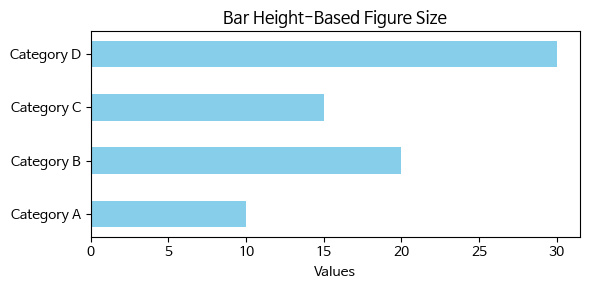

In [16]:
import matplotlib.pyplot as plt

# Data
categories = ['Category A', 'Category B', 'Category C', 'Category D']
values = [10, 20, 15, 30]

# Parameters
bar_height = 0.5  # height of each bar
n_bars = len(categories)
padding = 1       # add a bit of vertical padding

# Calculate total figure height in inches (arbitrary width)
fig_height = n_bars * bar_height + padding
fig_width = 6  # you can adjust this

# Create the figure with calculated size
fig, ax = plt.subplots(figsize=(fig_width, fig_height))

# Plot horizontal bar chart
ax.barh(categories, values, height=bar_height, color='skyblue')
ax.set_xlabel('Values')
ax.set_title('Bar Height-Based Figure Size')

plt.tight_layout()
plt.show()


In [26]:
def summary(self, *pf_names, date=None, int_to_str=True, category=None, sort_by=None, 
            plot=False, roi=True, figsize=None):
    """
    get cashflow & pnl of groups in category (default portfolio) on date
    """       
    pf_names = self.check_portfolios(*pf_names)
    if len(pf_names) == 0:
        return None
    # history not supported in summary
    date = None if date == 'all' else date
    nms_v = self.names_vals
    nm_ttl = nms_v['ttl']
    nm_start = nms_v['start']
    nm_end = nms_v['end']
    nm_roi = nms_v['roi']
    nm_ugl = nms_v['ugl']
    nm_buy = nms_v['buy']

    df_val = self._valuate(*pf_names, date=date, category=category)
    if plot:
        df_val = df_val.reset_index()
        df_val = df_val.sort_values(sort_by, ascending=True) if sort_by in df_val.columns else df_val
        category = category or self.col_portfolio
        return df_val, category, roi, figsize
        axes = PortfolioBuilder._plot_assets(df_val.reset_index(), col_name=category, roi=roi, figsize=figsize)
        return None
    else:
        # set total
        df_val = df_val.T
        df_val[nm_ttl] = [df_val.loc[nm_start].min(), df_val.loc[nm_end].max(), 
                             *df_val.iloc[2:].sum(axis=1).to_list()]
        df_ttl = df_val[nm_ttl]
        df_val.loc[nm_roi, nm_ttl] = df_ttl[nm_ugl] / df_ttl[nm_buy]
        return df_val.map(format_price, digits=0) if int_to_str else df_val
        


def _plot_assets(df_val, roi=True, figsize=None, label=True,
                 col_name='name', col_value='value', col_roi='roi', cpl_ugl='ugl',
                 bar_height=0.5, padding=1):
    """
    Bar chart displaying the performance of individual assets within the portfolio
    df_val: output of self.valuate(date=None, total=False, int_to_str=False)
    """
    kw = dict(kind='barh', legend=False)
    fig, (ax1, ax2) = plt.subplots(1,2, sharey=True, figsize=figsize)
    _ = df_val.plot(col_name, col_value, ax=ax1, title='Value', **kw)
    if roi:
        _ = (df_val.assign(roi=df_val[col_roi].mul(100))
             .plot(col_name, col_roi, ax=ax2, color='orange', title='ROI(%)', **kw))
    else:
        _ = df_val.plot(col_name, cpl_ugl, ax=ax2, color='orange', title='UGL', **kw)
    _ = ax1.set_ylabel(None)
    _ = ax2.axvline(0, lw=0.5, c='gray')

    # Update the figure size
    n_bars = df_val[col_name].nunique()
    height_tmp = n_bars * bar_height + padding
    width, height = fig.get_size_inches()
    if height_tmp > height:
        fig.set_size_inches(width, height_tmp)

    if label:
        _= ax1.bar_label(ax1.containers[0], label_type='center', fmt='{:,g}')
        _= ax2.bar_label(ax2.containers[0], label_type='center', fmt='{:.1f}' if roi else '{:,g}')
    
    plt.subplots_adjust(wspace=0.05)
    return (ax1, ax2)


from pf_utils import format_price, PortfolioBuilder

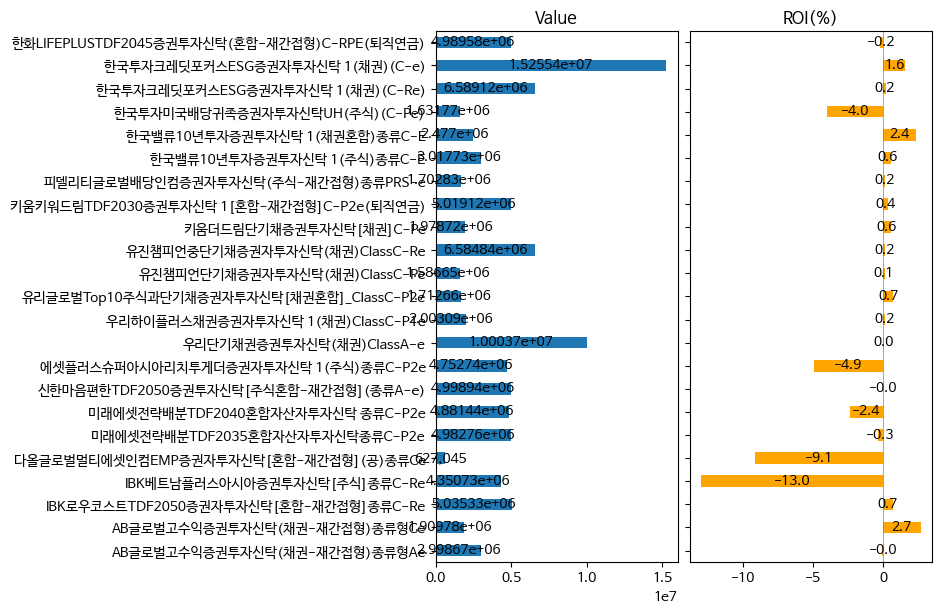

In [44]:
category = 'name'
res = summary(pm, plot=True, category=category)
df_val, category, roi, figsize = res
#axes = PortfolioBuilder._plot_assets(df_val.reset_index(), col_name=category, roi=roi, figsize=figsize)
#_ = _plot_assets(df_val.reset_index(), col_name=category, roi=roi, figsize=figsize)
_ = _plot_assets(df_val, col_name=category, roi=roi, figsize=figsize, 
                bar_height=0.3, padding=0
                )

In [31]:
df_val

,portfolio,start,end,buy,sell,value,ugl,roi
0,FISA_2504,2025-04-28,2025-05-02,31000000.0,0.0,31028033,28033.0,0.000904
1,HANA_2408,2024-08-01,2025-05-02,9990000.0,0.0,10260233,270233.0,0.027050
2,SAVE_2503,2025-03-17,2025-05-02,7067714.0,0.0,7025973,-41741.0,-0.005906
3,SAVE_2504,2025-04-21,2025-05-02,3584916.0,0.0,3589744,4828.0,0.001347
4,TDF_2406,2024-06-19,2025-05-02,48148612.0,0.0,47185646,-962966.0,-0.020000


In [23]:
pf_fisa.valuate('all', print_msg=True, join_str=True)

,buy,sell,value,ugl,roi
date,,,,,
2025-04-28,23003000.0,-251.592457,23000000,-3251.592457,-0.000141
2025-04-29,31039400.0,-251.592457,30990947,-48704.592457,-0.001569
2025-04-30,31039400.0,-251.592457,31028453,-11198.592457,-0.000361
2025-05-02,31039400.0,-251.592457,31028035,-11616.592457,-0.000374
